
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

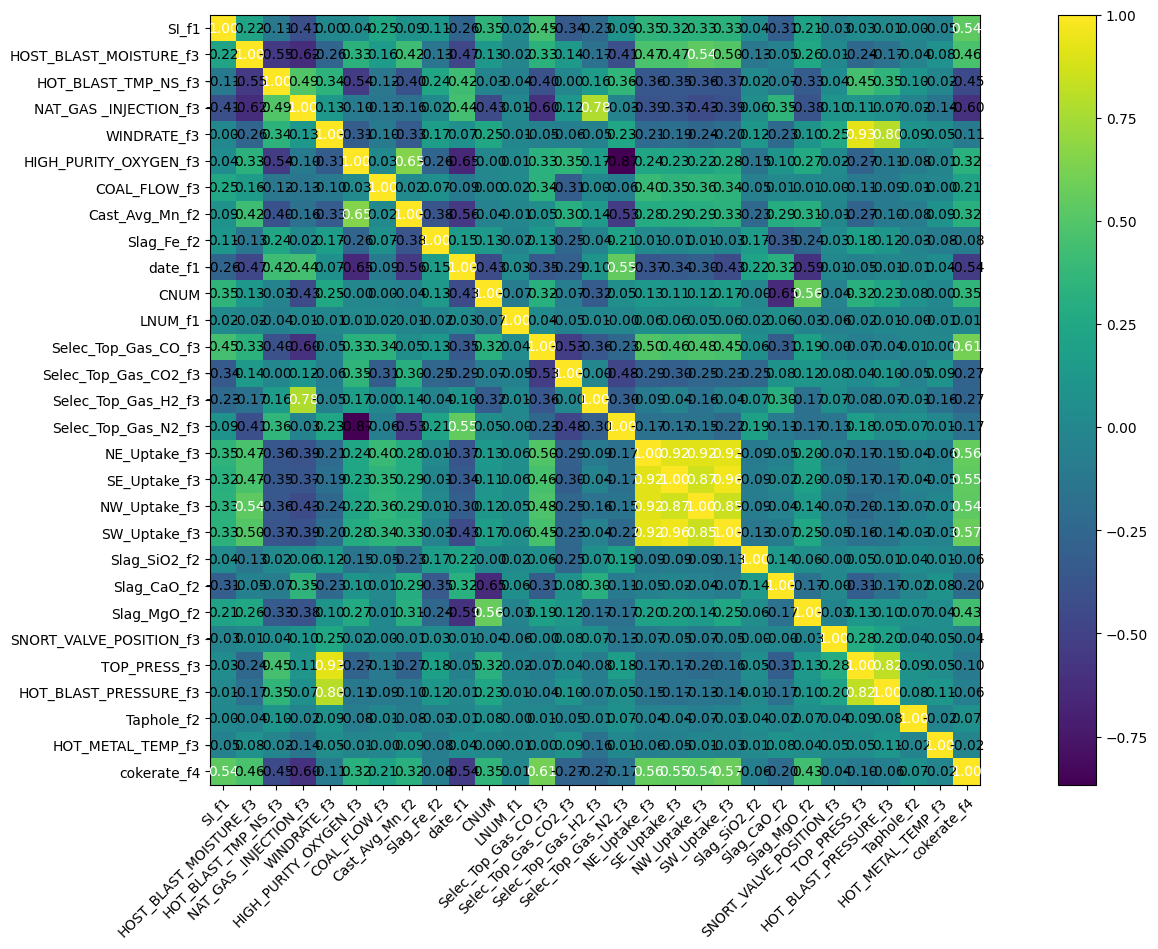

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

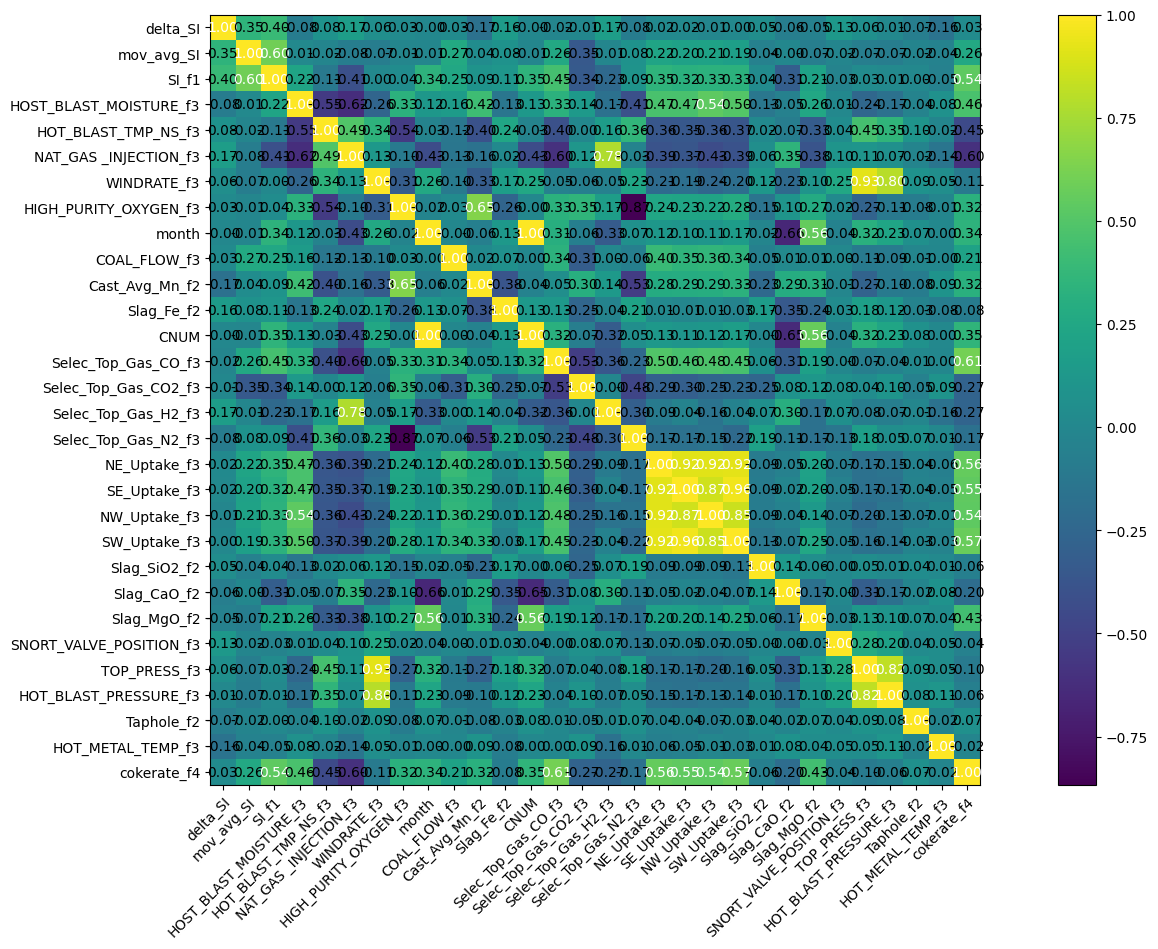

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.171535
Loss_SI: 1.3070982694625854 Loss_all: 1.1803525686264038
===


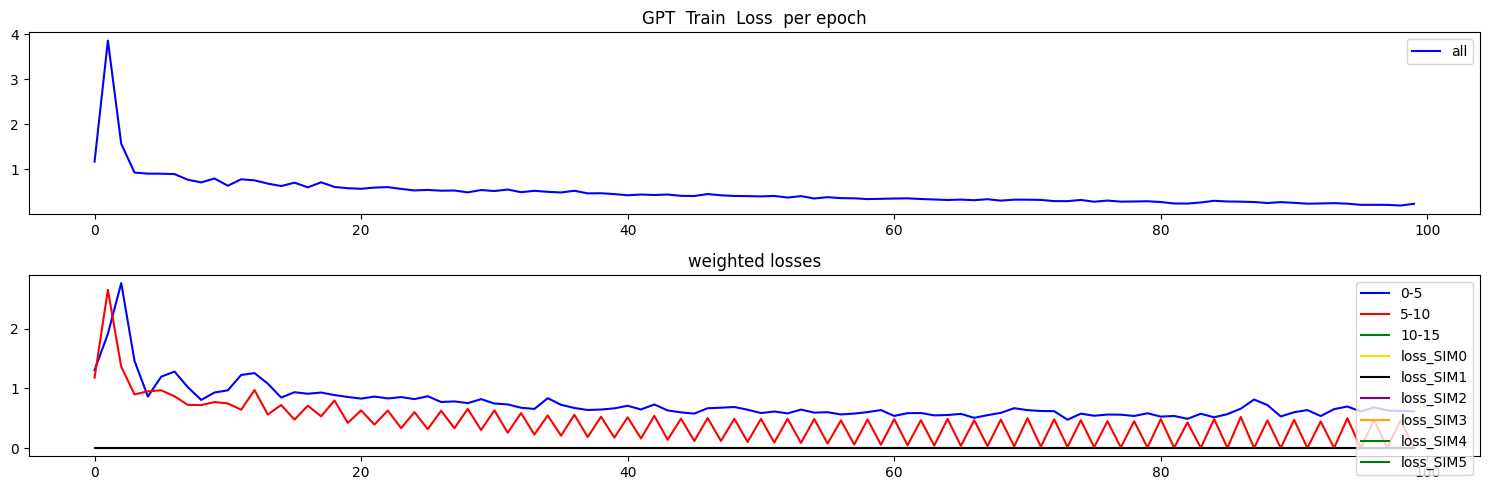

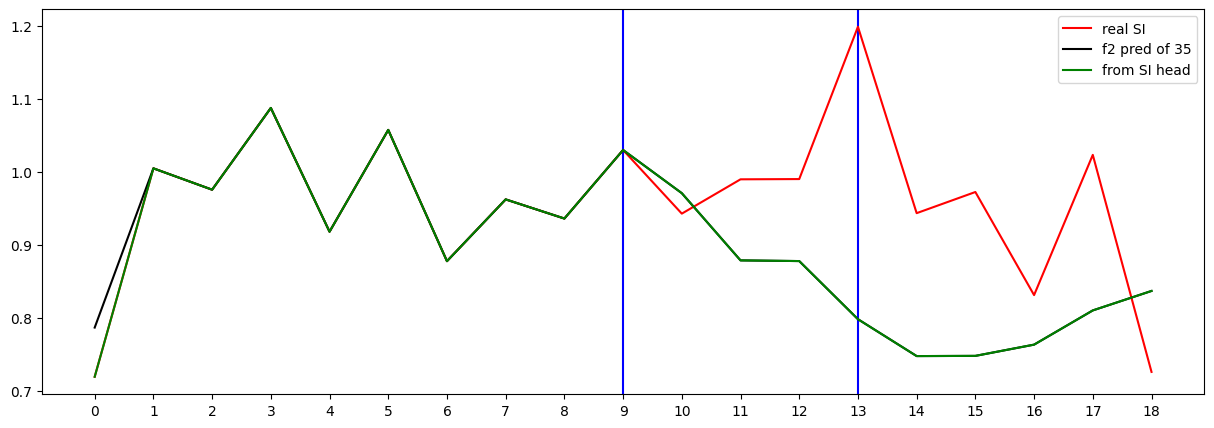

Testing R**2 - (all) - (no inputs):  0.9931825668968974
Testing R**2 - (f2) - SI full (no inputs):  -0.5219533635918974
Testing R**2 - SI head only (no inputs):  -0.5219533635918974
0 ...index R**2 (no inputs):  -0.007804301932794022
1 ...index R**2 (no inputs):  -1.0778155637680649
2 ...index R**2 (no inputs):  -0.5219533635918974
3 ...index R**2 (no inputs):  -3.8586381606851505
4 ...index R**2 (no inputs):  -1.448891068557352
5 ...index R**2 (no inputs):  -0.7195976055784699
6 ...index R**2 (no inputs):  -26.553880455933452
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08094379320798883
10 ...index R**2 (no inputs):  -1.2898299745353974
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2095050565218335
16 ...index R**2 (no inputs):  -0.27863080607843815
17 ...index R**2 (no inputs):  -117.76191228230795
18 

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.213075
Loss_SI: 1.2903021574020386 Loss_all: 1.181961178779602
===


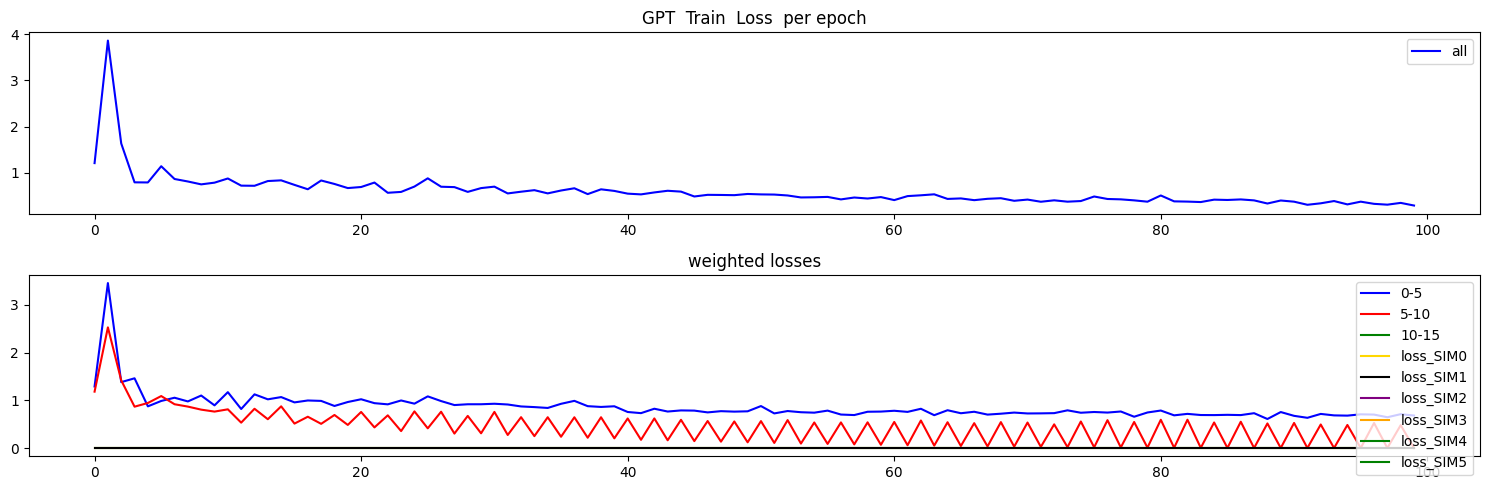

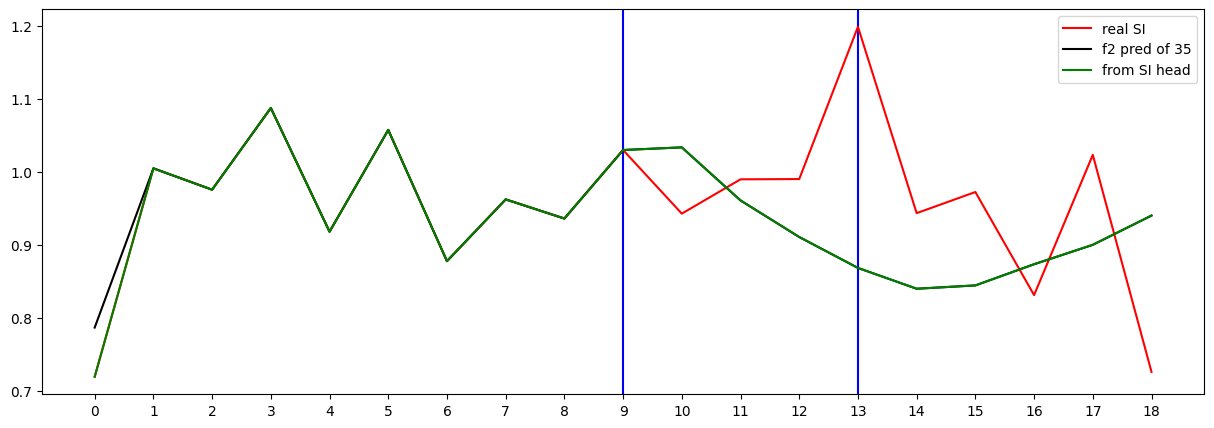

Testing R**2 - (all) - (no inputs):  0.9899041474351562
Testing R**2 - (f2) - SI full (no inputs):  -0.1333586825431412
Testing R**2 - SI head only (no inputs):  -0.1333586825431412
0 ...index R**2 (no inputs):  -0.0988219511264421
1 ...index R**2 (no inputs):  -0.7197634696081119
2 ...index R**2 (no inputs):  -0.1333586825431412
3 ...index R**2 (no inputs):  -4.371347780333595
4 ...index R**2 (no inputs):  -0.4218247857480688
5 ...index R**2 (no inputs):  -1.7689989920160225
6 ...index R**2 (no inputs):  -9.243874218752147
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.01357533482615858
10 ...index R**2 (no inputs):  -1.2850743744742288
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.41308728775068304
16 ...index R**2 (no inputs):  -0.07805922770458529
17 ...index R**2 (no inputs):  -321.6293131510417
18 ...i

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.271585
Loss_SI: 1.1601585149765015 Loss_all: 1.1898099184036255
===


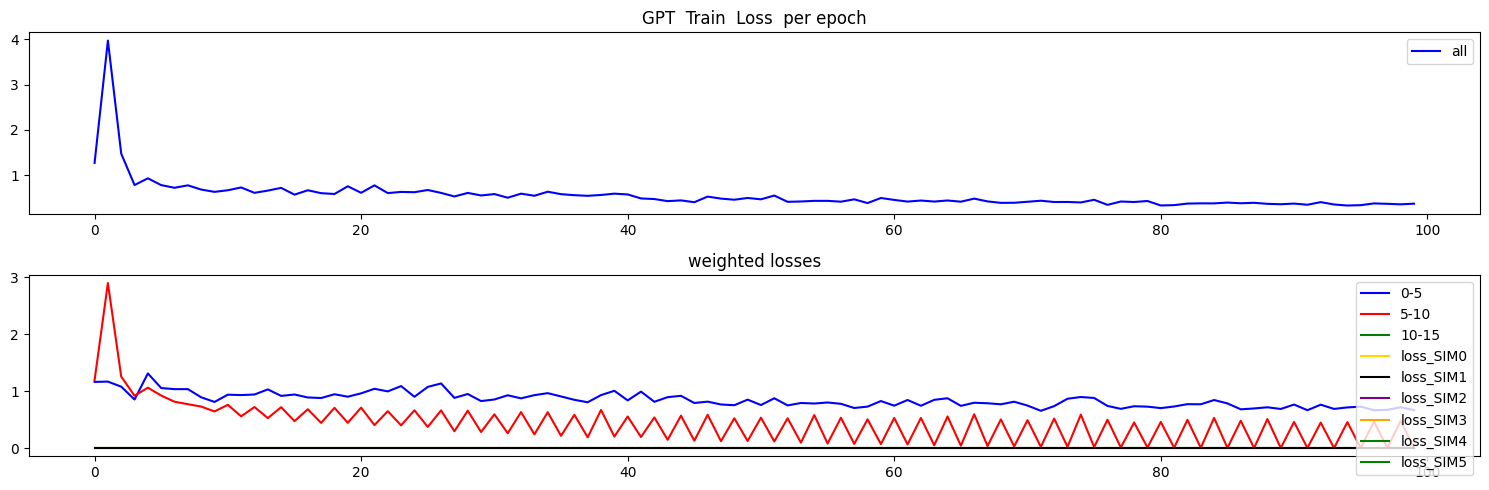

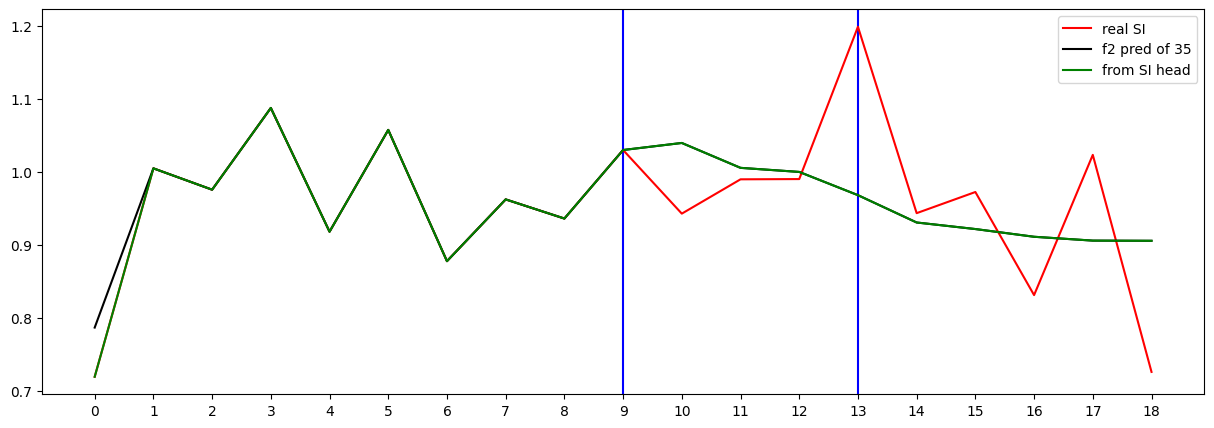

Testing R**2 - (all) - (no inputs):  0.9946461079594645
Testing R**2 - (f2) - SI full (no inputs):  0.287346456661129
Testing R**2 - SI head only (no inputs):  0.287346456661129
0 ...index R**2 (no inputs):  -0.050656234843766024
1 ...index R**2 (no inputs):  0.09526736913089306
2 ...index R**2 (no inputs):  0.287346456661129
3 ...index R**2 (no inputs):  -8.416753204978868
4 ...index R**2 (no inputs):  -0.38650365312927937
5 ...index R**2 (no inputs):  -0.2163626067700184
6 ...index R**2 (no inputs):  -49.79685756872694
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1441732006708829
10 ...index R**2 (no inputs):  -0.891273938093897
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.026587683629346603
16 ...index R**2 (no inputs):  -0.0743385897836637
17 ...index R**2 (no inputs):  -722.766162109375
18 ...index R

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.364377
Loss_SI: 1.2760690450668335 Loss_all: 1.408304214477539
===


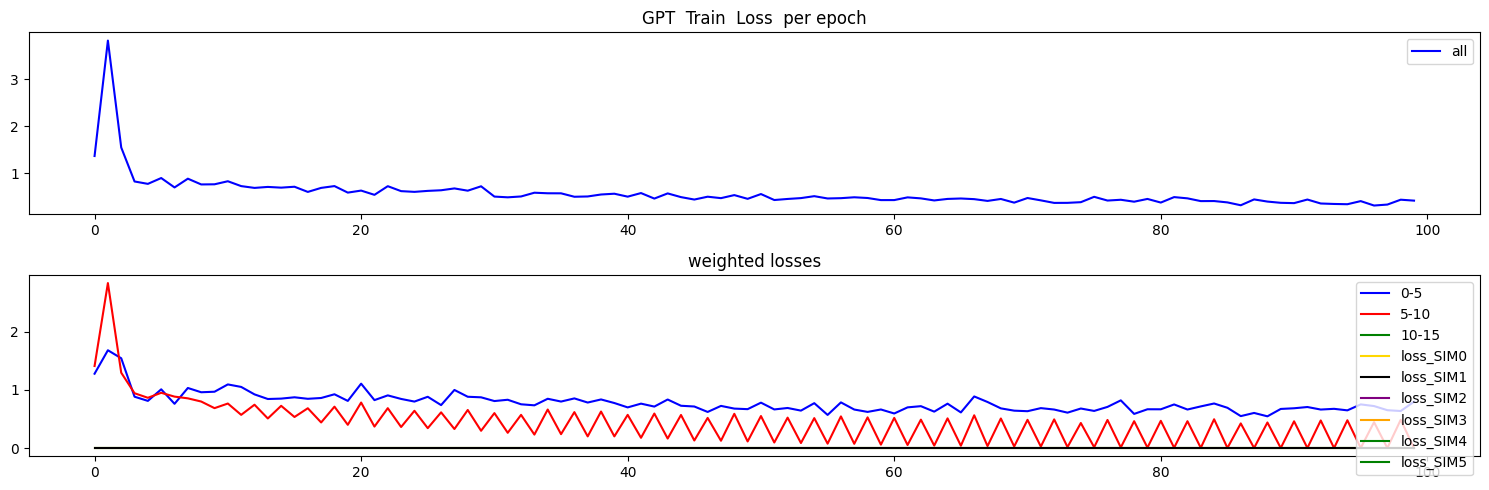

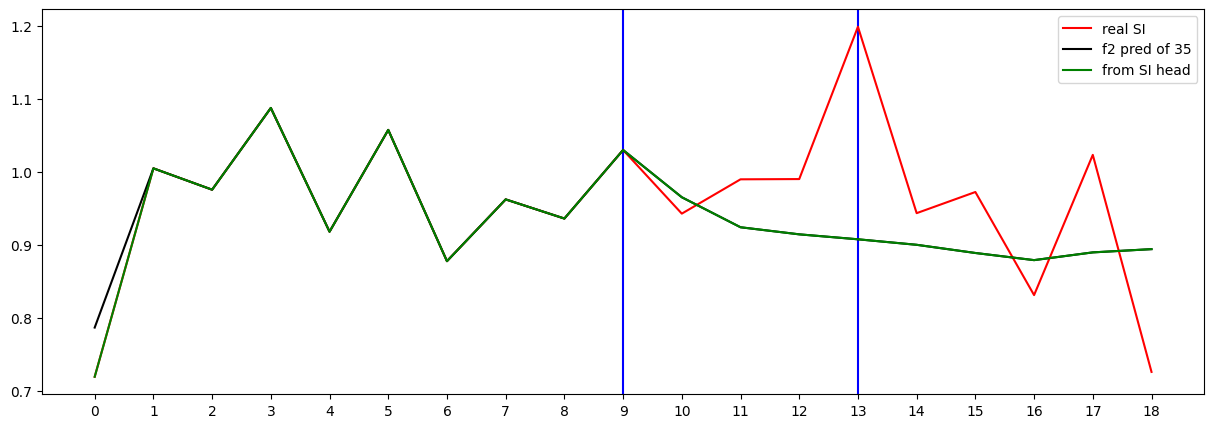

Testing R**2 - (all) - (no inputs):  0.9940328389971305
Testing R**2 - (f2) - SI full (no inputs):  0.06462562142183326
Testing R**2 - SI head only (no inputs):  0.06462562142183326
0 ...index R**2 (no inputs):  -0.13784485716320227
1 ...index R**2 (no inputs):  -0.06398166627503454
2 ...index R**2 (no inputs):  0.06462562142183326
3 ...index R**2 (no inputs):  -13.308830283731414
4 ...index R**2 (no inputs):  -5.11123972374357
5 ...index R**2 (no inputs):  -0.4163145877512473
6 ...index R**2 (no inputs):  -4.06187009062649
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05805273103900155
10 ...index R**2 (no inputs):  -0.5889877521952909
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4986880244349146
16 ...index R**2 (no inputs):  0.019366041606432405
17 ...index R**2 (no inputs):  -605.0707092285156
18 ...i

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.140314
Loss_SI: 1.1026113033294678 Loss_all: 1.164494276046753
===


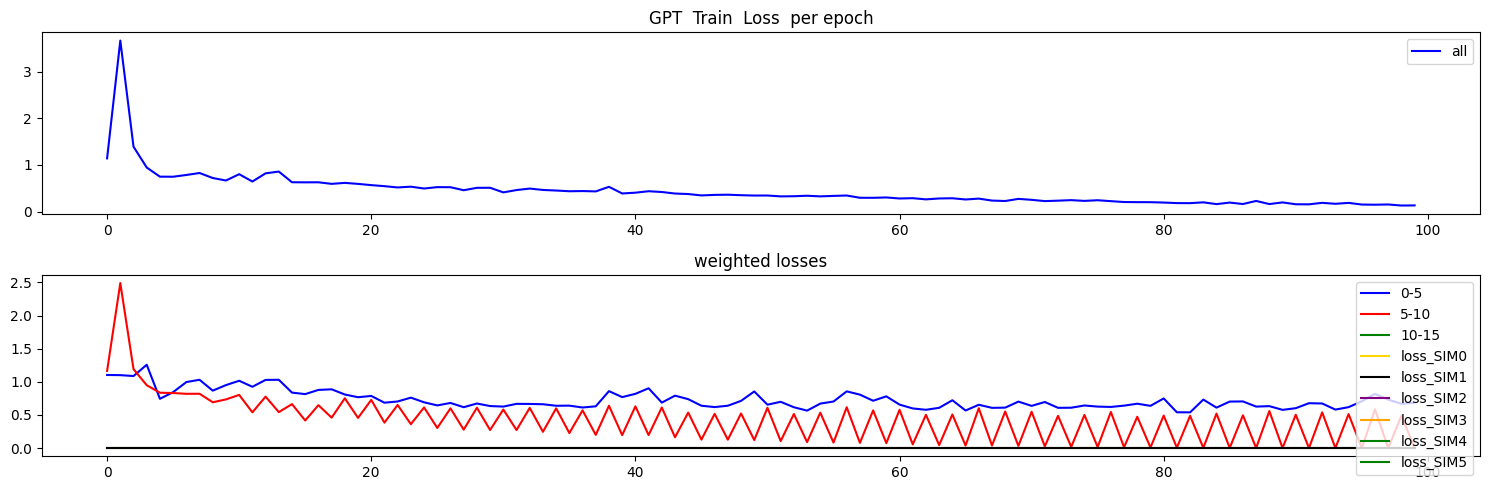

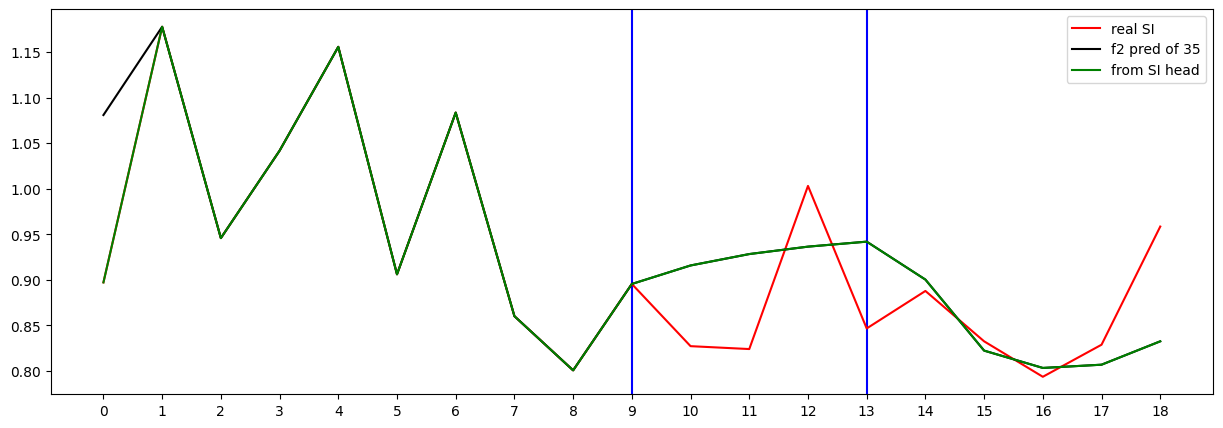

Testing R**2 - (all) - (no inputs):  0.990367830400379
Testing R**2 - (f2) - SI full (no inputs):  -0.5326975992106557
Testing R**2 - SI head only (no inputs):  -0.5326975992106557
0 ...index R**2 (no inputs):  -0.12918891751597084
1 ...index R**2 (no inputs):  -0.07313461970896795
2 ...index R**2 (no inputs):  -0.5326975992106557
3 ...index R**2 (no inputs):  -8.625389149934612
4 ...index R**2 (no inputs):  -1.662019492592623
5 ...index R**2 (no inputs):  -1.0875153425994477
6 ...index R**2 (no inputs):  -145.09162483598183
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04193128548909009
10 ...index R**2 (no inputs):  -0.12974553128767097
11 ...index R**2 (no inputs):  -2.025039478704435
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7145777647043297
16 ...index R**2 (no inputs):  -0.5978964691017197
17 ...index R**2 (no inputs):  -13.229880

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.147633
Loss_SI: 1.4834260940551758 Loss_all: 1.1941750049591064
===


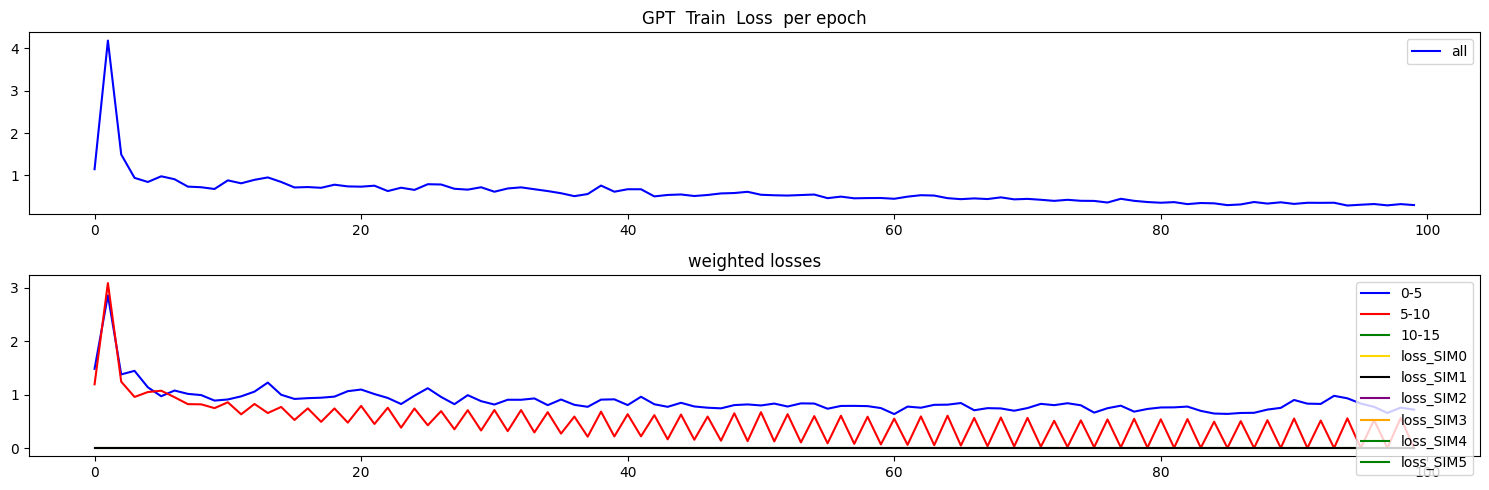

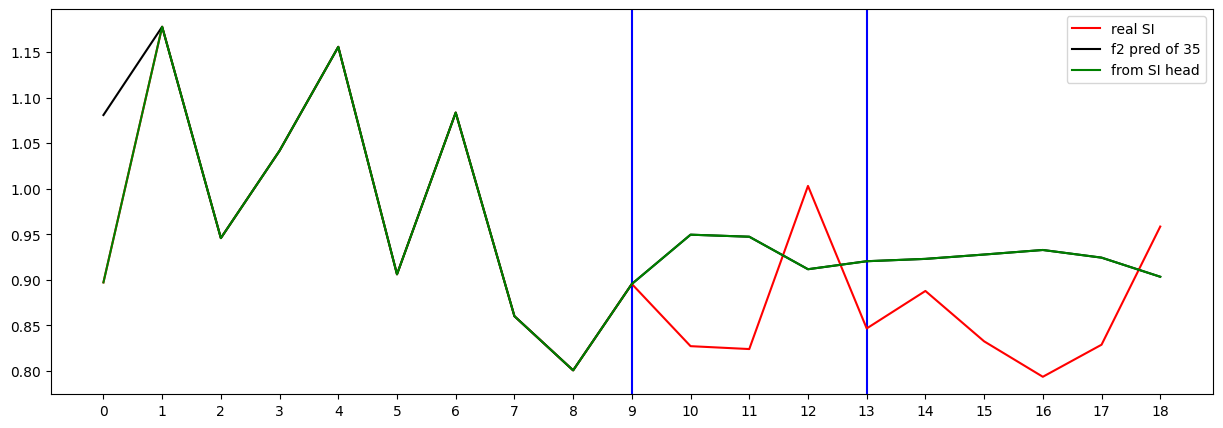

Testing R**2 - (all) - (no inputs):  0.9928969364826267
Testing R**2 - (f2) - SI full (no inputs):  -0.6410178961866282
Testing R**2 - SI head only (no inputs):  -0.6410178961866282
0 ...index R**2 (no inputs):  0.04695059188175399
1 ...index R**2 (no inputs):  0.2722316453536997
2 ...index R**2 (no inputs):  -0.6410178961866282
3 ...index R**2 (no inputs):  -0.17745936671888907
4 ...index R**2 (no inputs):  -1.8443725961254969
5 ...index R**2 (no inputs):  -0.5393430285670622
6 ...index R**2 (no inputs):  -27.277316995104304
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30159174076039585
10 ...index R**2 (no inputs):  0.2350428746890102
11 ...index R**2 (no inputs):  -54.87869236398867
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.370561792045223
16 ...index R**2 (no inputs):  -0.03506608841802472
17 ...index R**2 (no inputs):  -152.677626

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.253486
Loss_SI: 1.374031901359558 Loss_all: 1.287409782409668
===


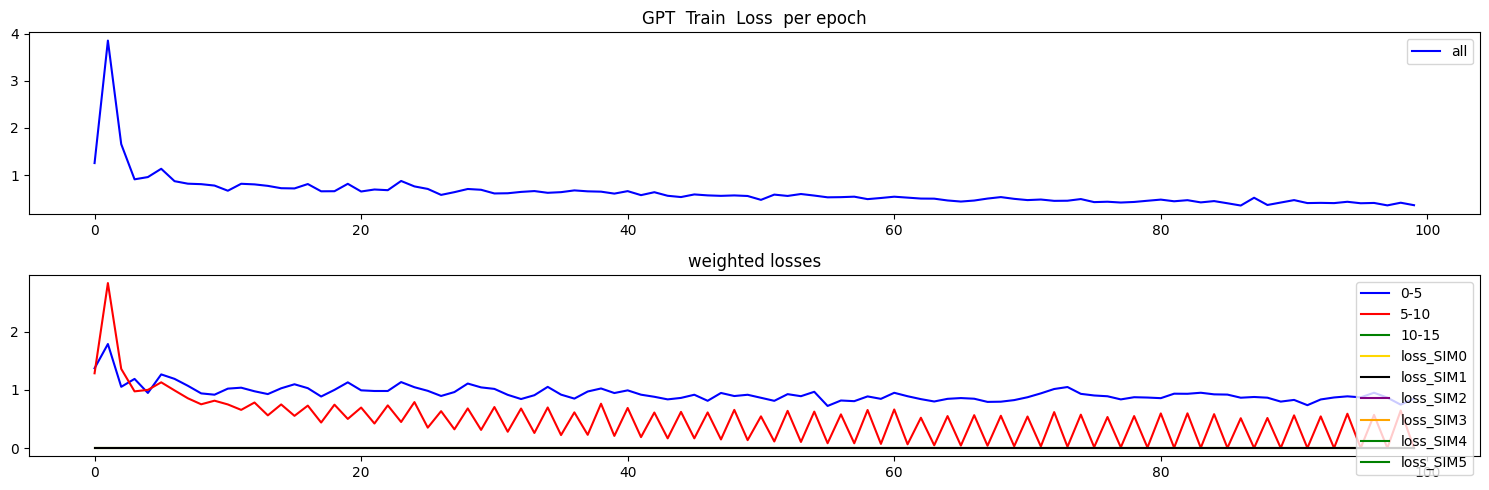

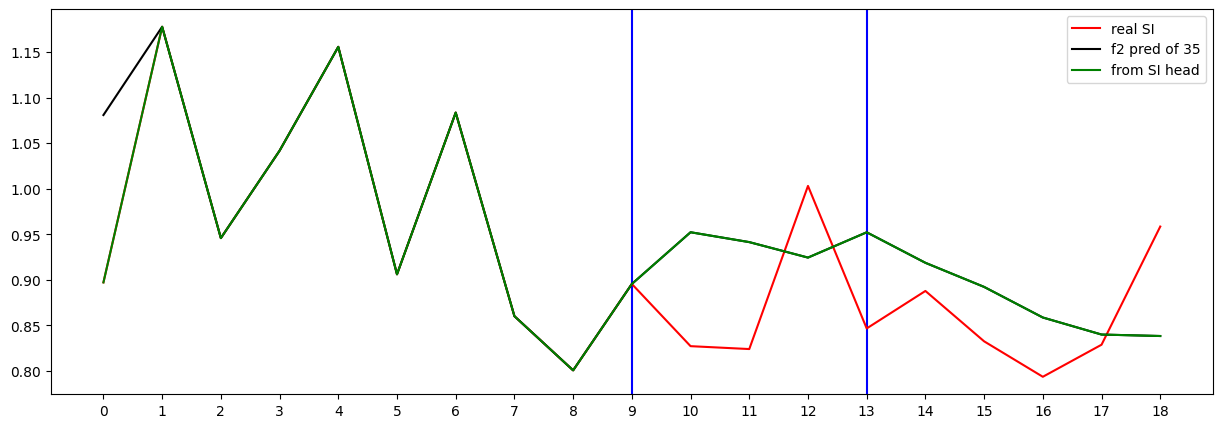

Testing R**2 - (all) - (no inputs):  0.9962663789428081
Testing R**2 - (f2) - SI full (no inputs):  -0.7369013555463446
Testing R**2 - SI head only (no inputs):  -0.7369013555463446
0 ...index R**2 (no inputs):  -0.017687822008716436
1 ...index R**2 (no inputs):  -0.057395322954342465
2 ...index R**2 (no inputs):  -0.7369013555463446
3 ...index R**2 (no inputs):  -3.3116180723035766
4 ...index R**2 (no inputs):  -1.5689458782908412
5 ...index R**2 (no inputs):  0.20119625259694018
6 ...index R**2 (no inputs):  -12.435952095369508
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.013168649727619108
10 ...index R**2 (no inputs):  0.054364594217940265
11 ...index R**2 (no inputs):  -194.6679538148797
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.251253018272814
16 ...index R**2 (no inputs):  -0.13062536527750623
17 ...index R**2 (no inputs):  -452

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.383174
Loss_SI: 1.4217702150344849 Loss_all: 1.3527723550796509
===


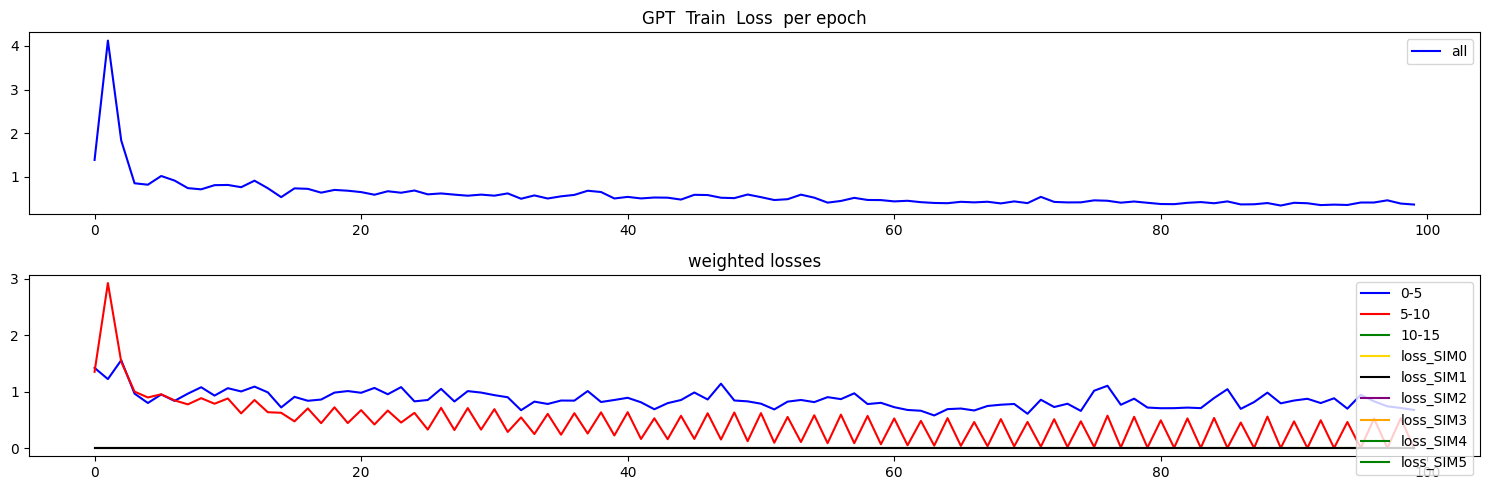

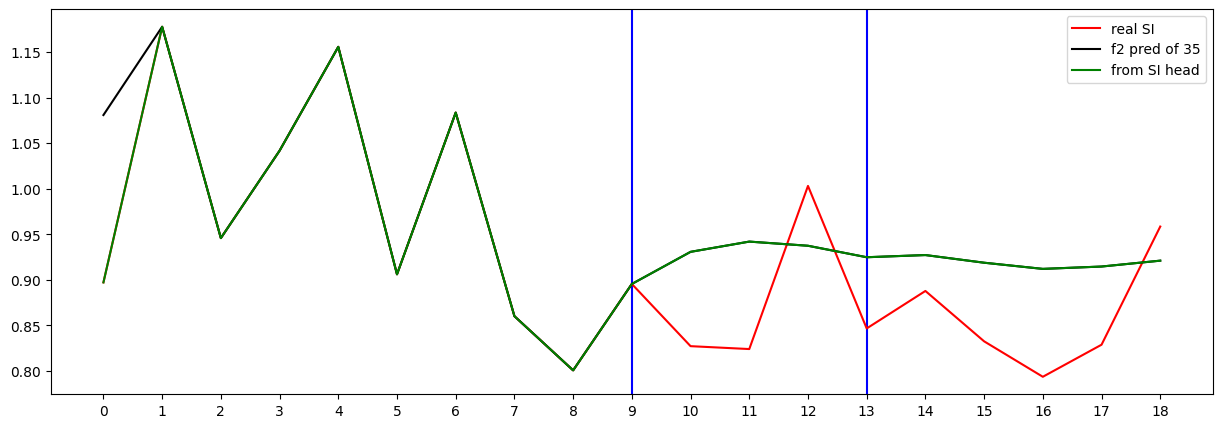

Testing R**2 - (all) - (no inputs):  0.9955043707606863
Testing R**2 - (f2) - SI full (no inputs):  -0.5470117898821583
Testing R**2 - SI head only (no inputs):  -0.5470117898821583
0 ...index R**2 (no inputs):  -0.1035838895081127
1 ...index R**2 (no inputs):  -0.0516857228718719
2 ...index R**2 (no inputs):  -0.5470117898821583
3 ...index R**2 (no inputs):  -2.7647649822301936
4 ...index R**2 (no inputs):  -0.1059808558356814
5 ...index R**2 (no inputs):  0.055623742069938364
6 ...index R**2 (no inputs):  -33.87350003336756
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.014503986163030613
10 ...index R**2 (no inputs):  -0.0280138299830619
11 ...index R**2 (no inputs):  -503.47541475100167
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7829454397211579
16 ...index R**2 (no inputs):  -0.7674381188622996
17 ...index R**2 (no inputs):  -1585.955

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.208962
Loss_SI: 1.4576950073242188 Loss_all: 1.242996096611023
===


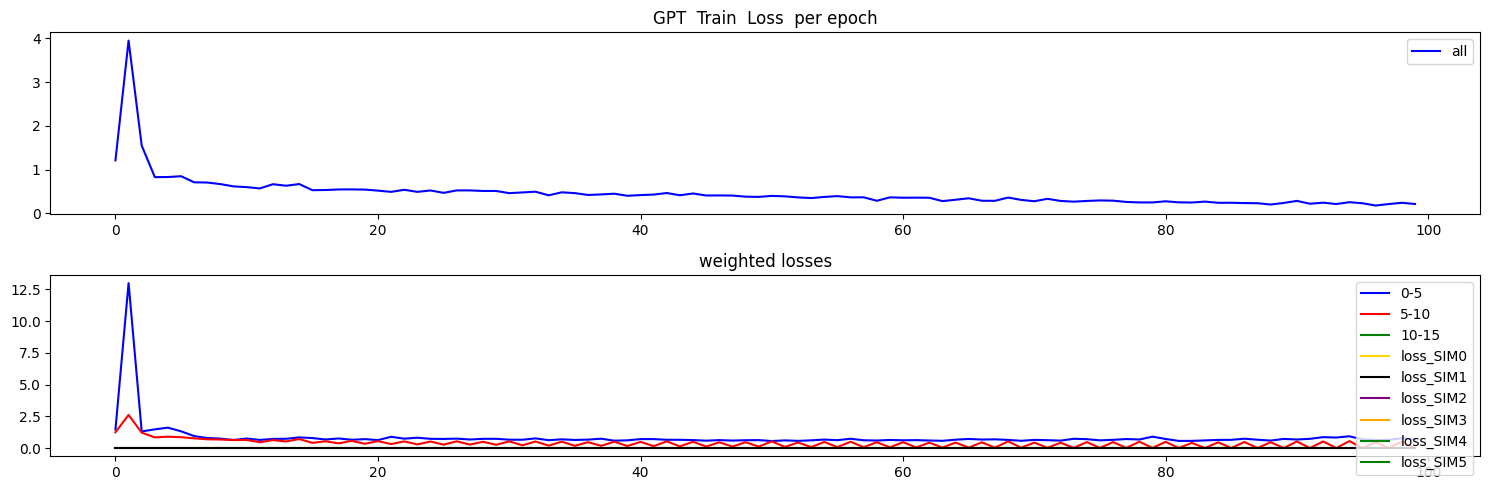

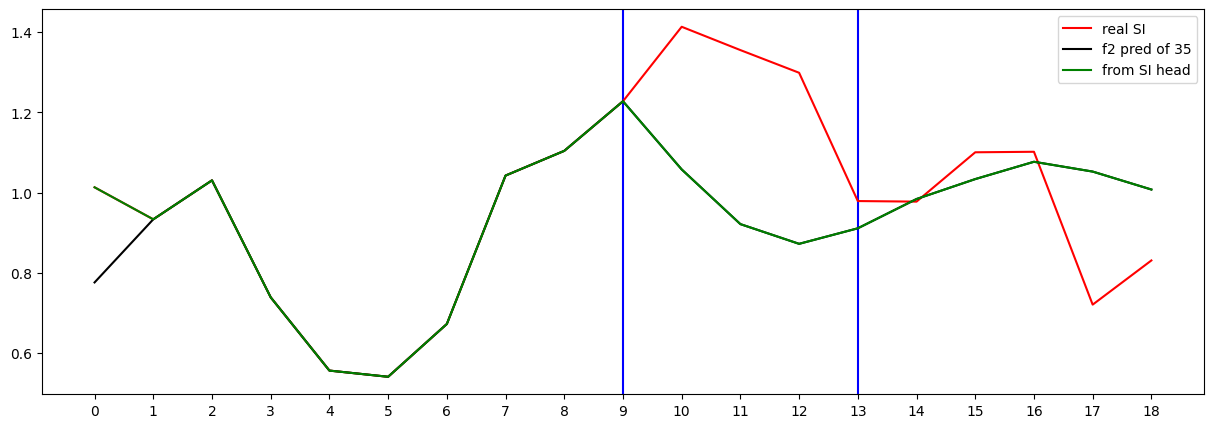

Testing R**2 - (all) - (no inputs):  0.9006931071411233
Testing R**2 - (f2) - SI full (no inputs):  -0.3446804348918602
Testing R**2 - SI head only (no inputs):  -0.3446804348918602
0 ...index R**2 (no inputs):  -0.13214555439305475
1 ...index R**2 (no inputs):  0.23914446256658684
2 ...index R**2 (no inputs):  -0.3446804348918602
3 ...index R**2 (no inputs):  -4.4499773014106125
4 ...index R**2 (no inputs):  -0.9791906235388392
5 ...index R**2 (no inputs):  -4.936197631151405
6 ...index R**2 (no inputs):  -24.173350513579297
7 ...index R**2 (no inputs):  -16.3375956243378
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5460800786727251
10 ...index R**2 (no inputs):  0.46337476909119324
11 ...index R**2 (no inputs):  -2472.6451076485746
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1684951417476026
16 ...index R**2 (no inputs):  -4.344361011992331
17 ...index R**2 (no inputs)

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.196986
Loss_SI: 1.3916070461273193 Loss_all: 1.2804862260818481
===


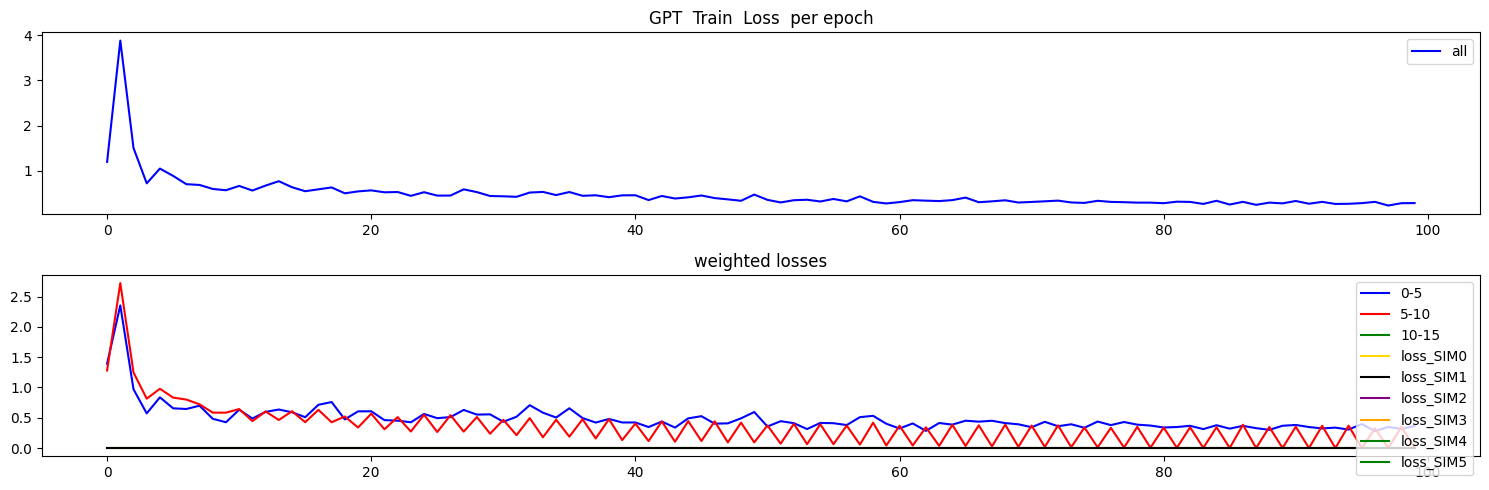

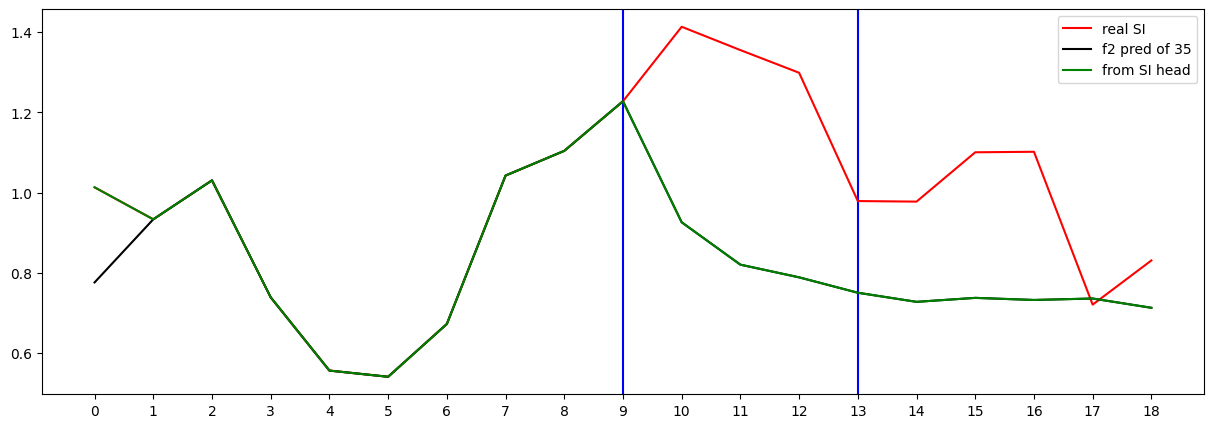

Testing R**2 - (all) - (no inputs):  0.8640121693267925
Testing R**2 - (f2) - SI full (no inputs):  -1.6596440835840602
Testing R**2 - SI head only (no inputs):  -1.6596440835840602
0 ...index R**2 (no inputs):  -0.08417022570161659
1 ...index R**2 (no inputs):  -0.3694556984059316
2 ...index R**2 (no inputs):  -1.6596440835840602
3 ...index R**2 (no inputs):  -7.839551571072686
4 ...index R**2 (no inputs):  -1.9957849483505932
5 ...index R**2 (no inputs):  -7.1313505977603455
6 ...index R**2 (no inputs):  0.4177482600706408
7 ...index R**2 (no inputs):  -21.606437503720798
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02136489359494509
10 ...index R**2 (no inputs):  0.02474953564457527
11 ...index R**2 (no inputs):  -87.32800523399571
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.41887717630804
16 ...index R**2 (no inputs):  -15.014916534405476
17 ...index R**2 (no inputs)

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.262318
Loss_SI: 1.2240904569625854 Loss_all: 1.2425119876861572
===


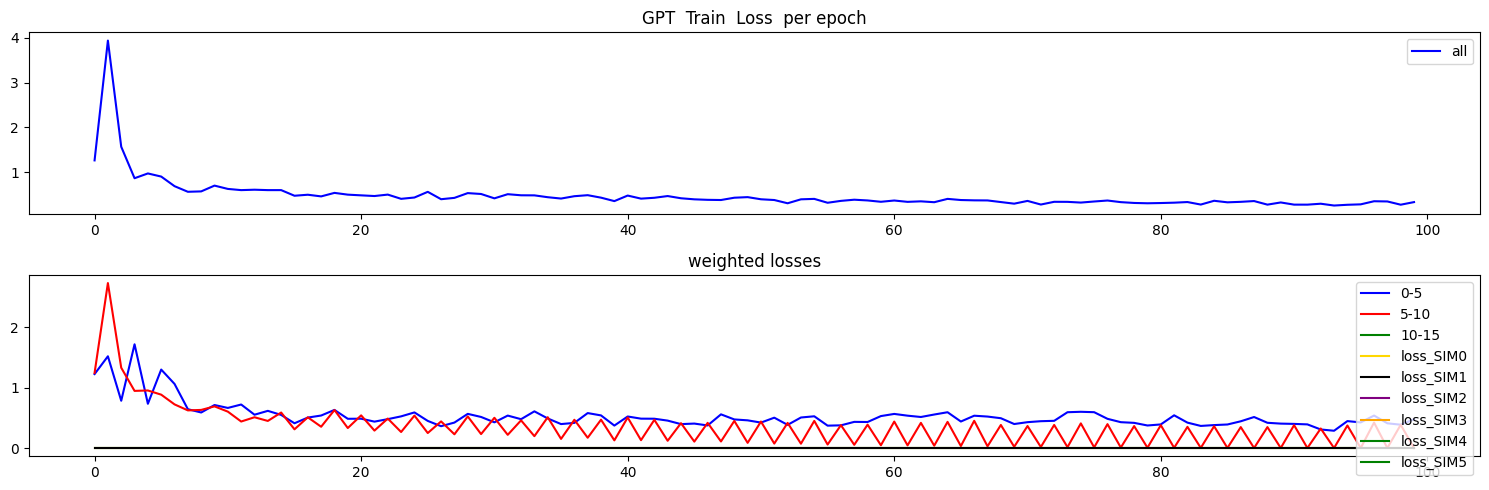

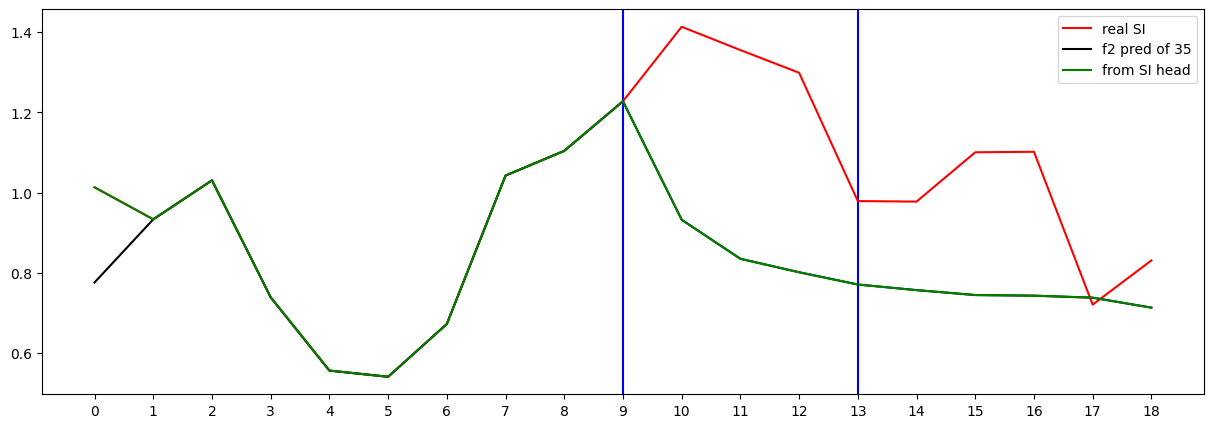

Testing R**2 - (all) - (no inputs):  0.8429364453744536
Testing R**2 - (f2) - SI full (no inputs):  -1.4797044453532098
Testing R**2 - SI head only (no inputs):  -1.4797044453532098
0 ...index R**2 (no inputs):  -0.10202617581679929
1 ...index R**2 (no inputs):  -0.3477402820605979
2 ...index R**2 (no inputs):  -1.4797044453532098
3 ...index R**2 (no inputs):  -7.029314495841032
4 ...index R**2 (no inputs):  -25.110398075412036
5 ...index R**2 (no inputs):  -8.381746854789165
6 ...index R**2 (no inputs):  -1.1779416536881557
7 ...index R**2 (no inputs):  -7.284098357497539
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.011551716726073469
10 ...index R**2 (no inputs):  0.02255239917057894
11 ...index R**2 (no inputs):  -426.2883121262176
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.304299276350643
16 ...index R**2 (no inputs):  -23.156900565655068
17 ...index R**2 (no inputs

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.110423
Loss_SI: 1.2177551984786987 Loss_all: 1.2319602966308594
===


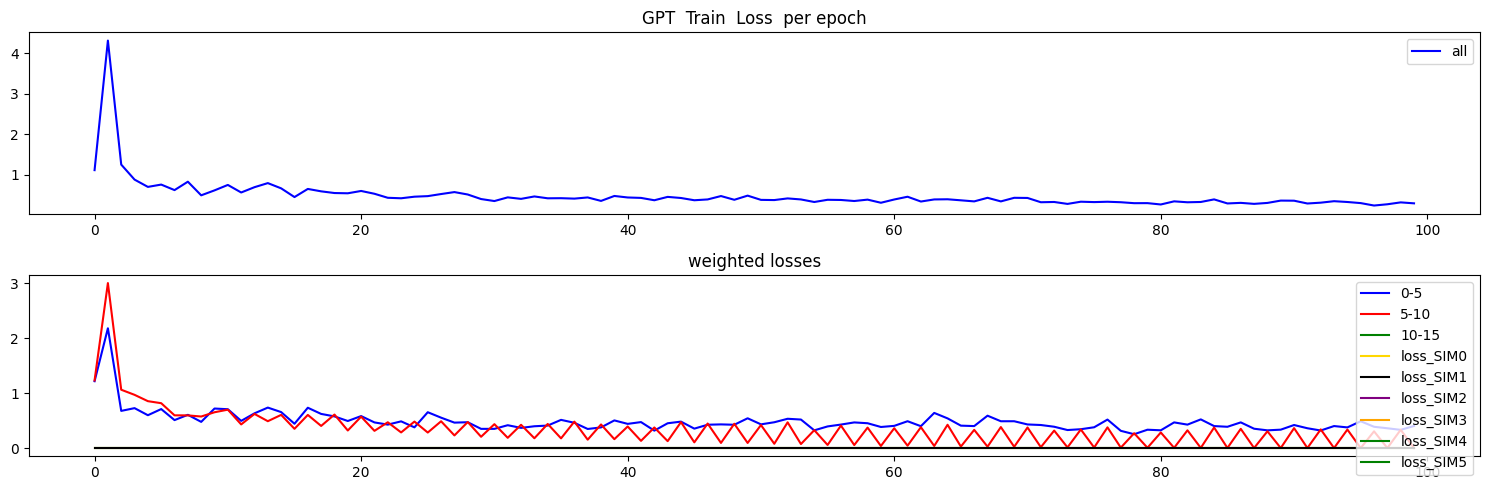

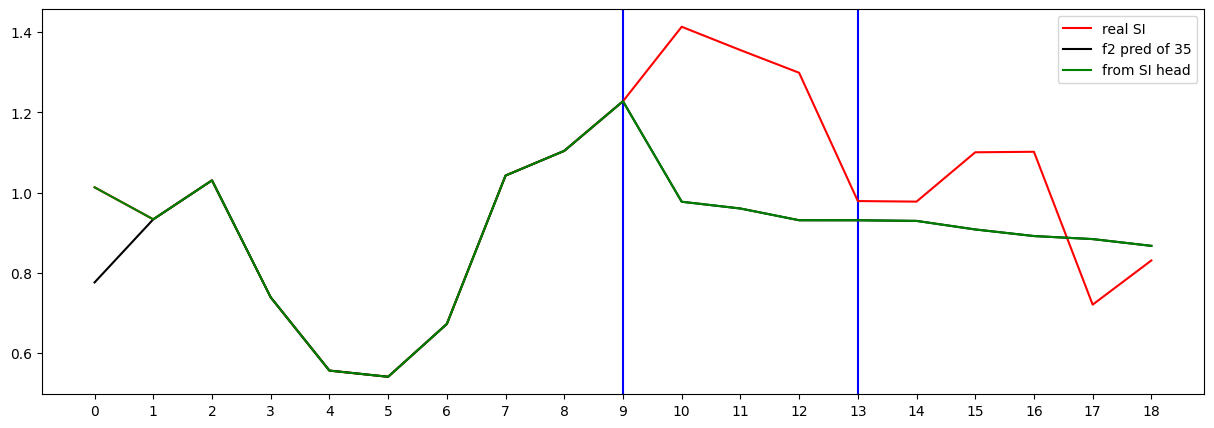

Testing R**2 - (all) - (no inputs):  0.9814100366946172
Testing R**2 - (f2) - SI full (no inputs):  -0.16528573658246204
Testing R**2 - SI head only (no inputs):  -0.16528573658246204
0 ...index R**2 (no inputs):  0.05433157962398605
1 ...index R**2 (no inputs):  0.26012920374692905
2 ...index R**2 (no inputs):  -0.16528573658246204
3 ...index R**2 (no inputs):  -3.2166444573779787
4 ...index R**2 (no inputs):  -3766.834135604344
5 ...index R**2 (no inputs):  -0.07970676828611944
6 ...index R**2 (no inputs):  -12.70555840654502
7 ...index R**2 (no inputs):  -308.0244587554396
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19863764355206914
10 ...index R**2 (no inputs):  -0.40722407356666657
11 ...index R**2 (no inputs):  -18.917538720935802
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4610609550416718
16 ...index R**2 (no inputs):  -2.3882311961252127
17 ...index R**2 (no i

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.113374
Loss_SI: 1.475398063659668 Loss_all: 1.1933612823486328
===


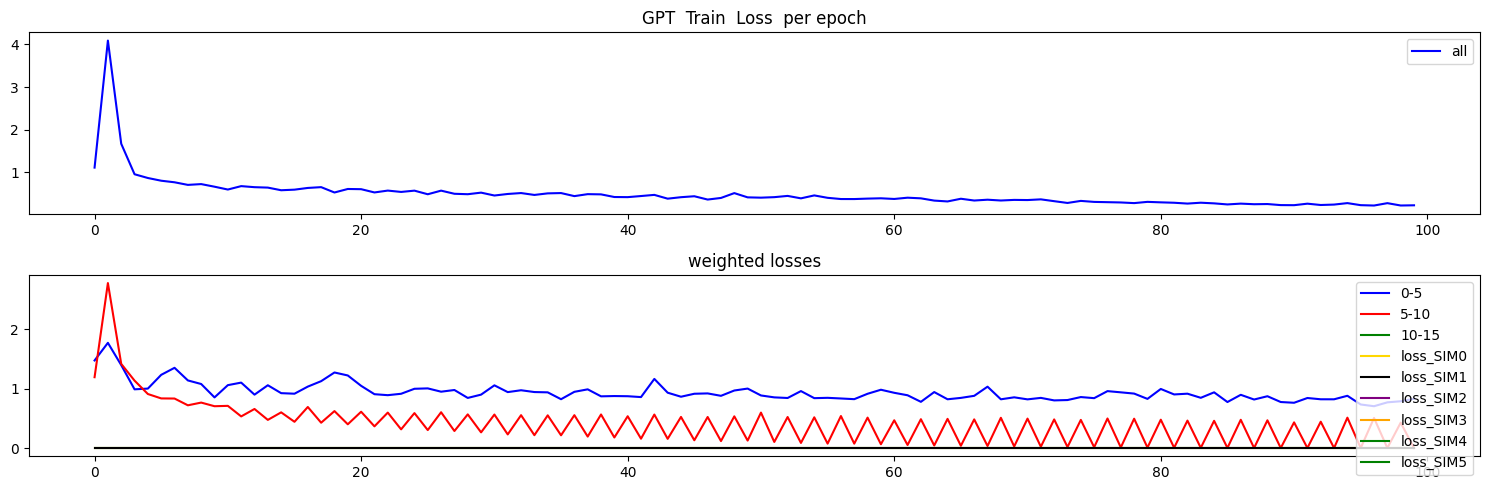

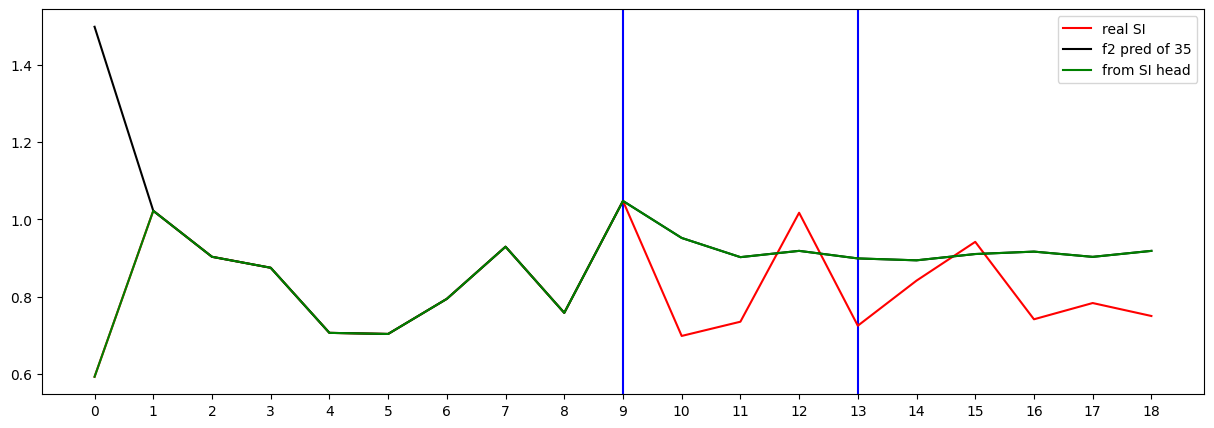

Testing R**2 - (all) - (no inputs):  0.9988480578765383
Testing R**2 - (f2) - SI full (no inputs):  -1.1894835808095419
Testing R**2 - SI head only (no inputs):  -1.1894835808095419
0 ...index R**2 (no inputs):  -0.2951281002849384
1 ...index R**2 (no inputs):  -0.18153044649153438
2 ...index R**2 (no inputs):  -1.1894835808095419
3 ...index R**2 (no inputs):  -46.090217555158915
4 ...index R**2 (no inputs):  -0.1541550090024284
5 ...index R**2 (no inputs):  -0.04606863167437458
6 ...index R**2 (no inputs):  -36.800280018572835
7 ...index R**2 (no inputs):  -66.66395455907337
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16648090268400106
10 ...index R**2 (no inputs):  -1.0172523045952704
11 ...index R**2 (no inputs):  -27.306109932764546
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3040588634958279
16 ...index R**2 (no inputs):  -0.24164522663016208
17 ...index R**2 (no i

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.232411
Loss_SI: 1.1991957426071167 Loss_all: 1.3046610355377197
===


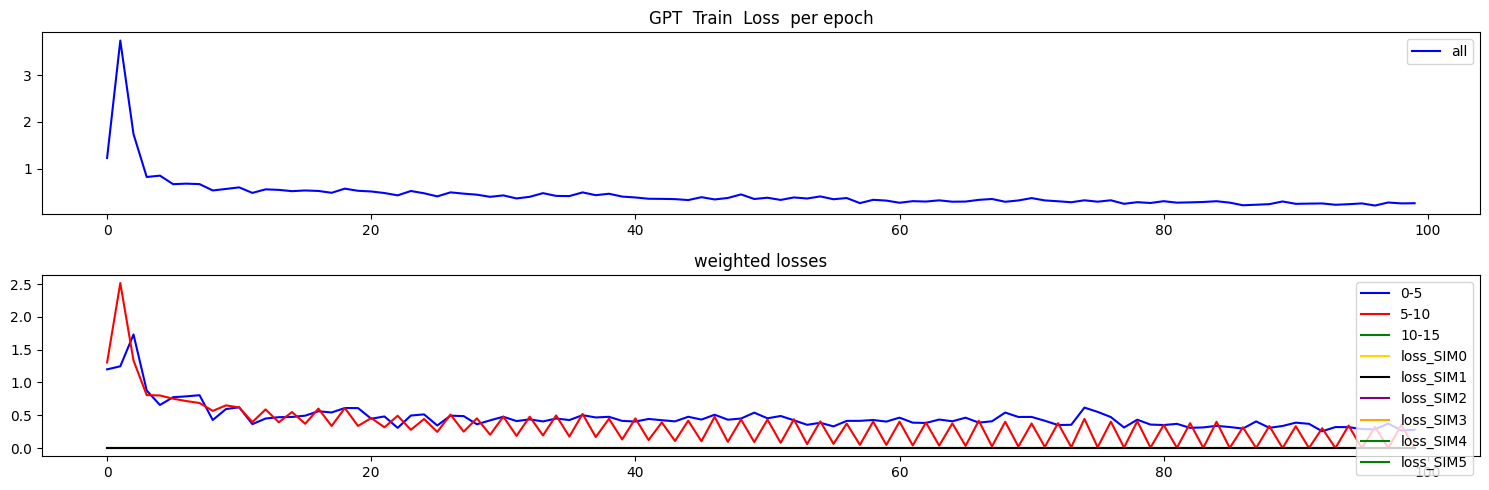

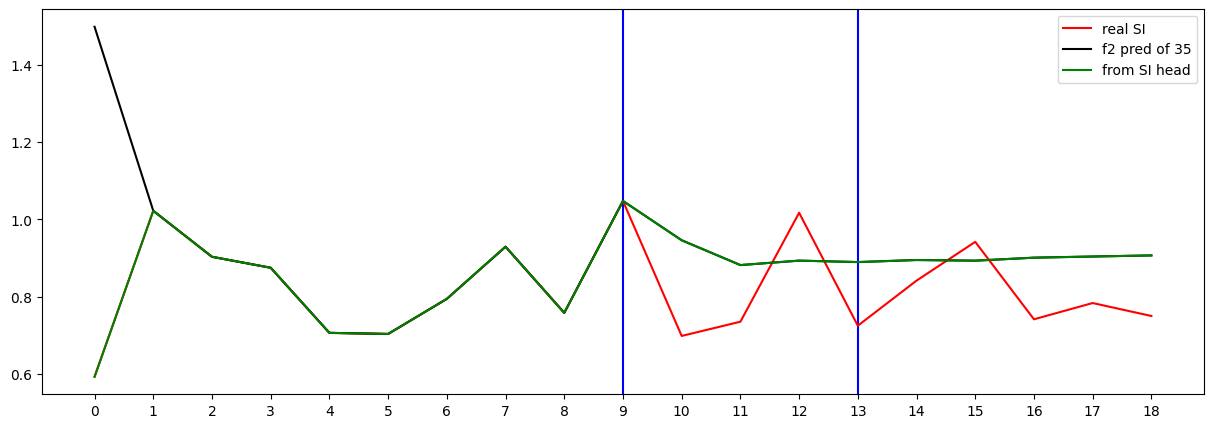

Testing R**2 - (all) - (no inputs):  0.9987542602604483
Testing R**2 - (f2) - SI full (no inputs):  -0.9986516538159182
Testing R**2 - SI head only (no inputs):  -0.9986516538159182
0 ...index R**2 (no inputs):  -0.4209921904896794
1 ...index R**2 (no inputs):  -0.37061035919149843
2 ...index R**2 (no inputs):  -0.9986516538159182
3 ...index R**2 (no inputs):  -3.8248718960297783
4 ...index R**2 (no inputs):  -0.1624964117874319
5 ...index R**2 (no inputs):  -0.12876736421306534
6 ...index R**2 (no inputs):  -54.75941875365298
7 ...index R**2 (no inputs):  -2007.230134569256
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3933781445070377
10 ...index R**2 (no inputs):  -0.26603498010569293
11 ...index R**2 (no inputs):  -1.9058022034061914
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.12409162369916249
16 ...index R**2 (no inputs):  -0.12598547960752216
17 ...index R**2 (no i

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.516607
Loss_SI: 1.3390171527862549 Loss_all: 1.358397364616394
===


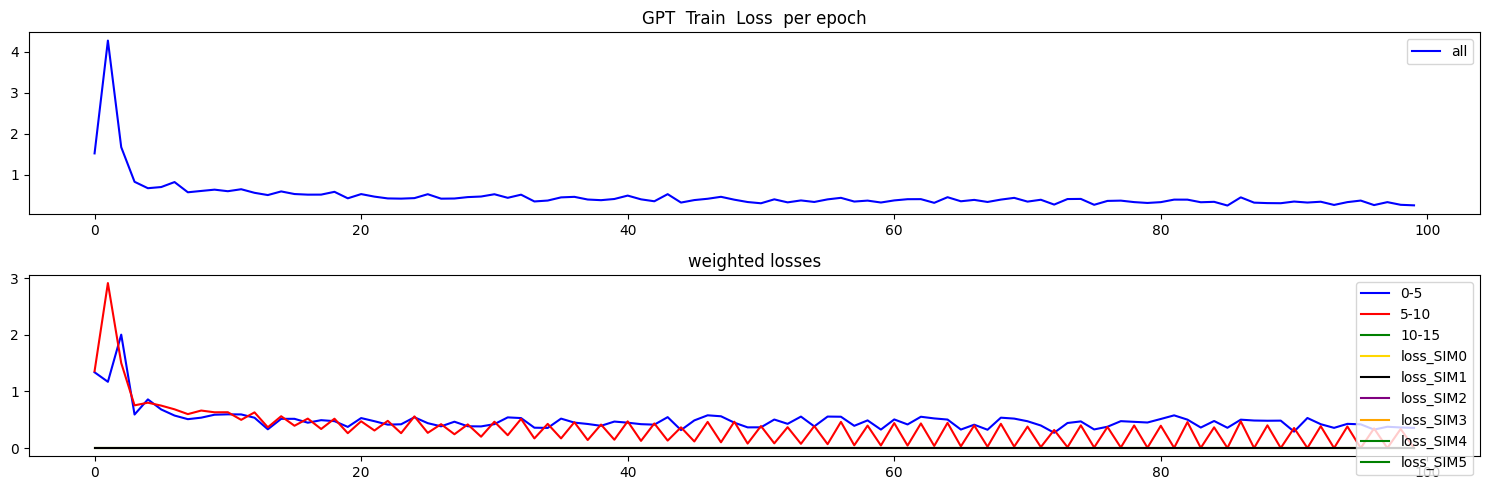

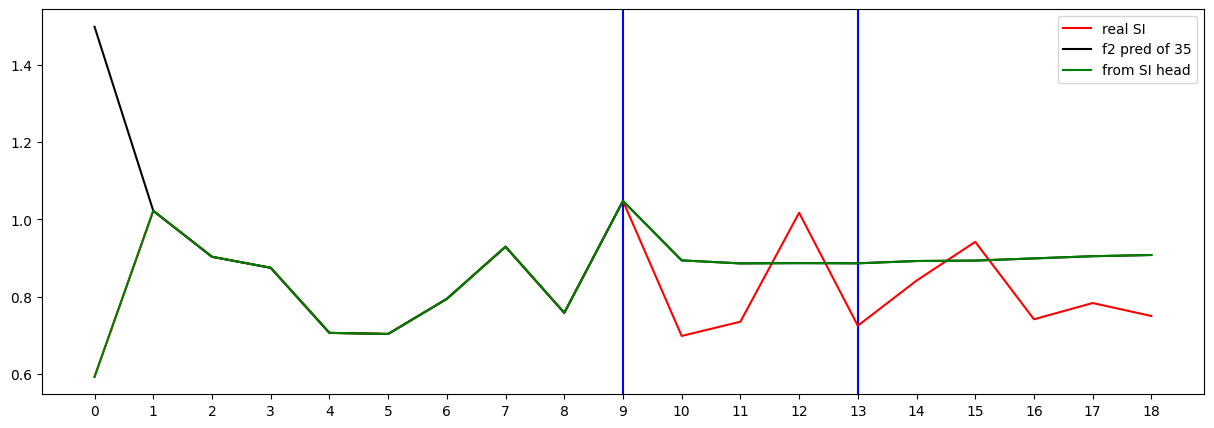

Testing R**2 - (all) - (no inputs):  0.9985078218126564
Testing R**2 - (f2) - SI full (no inputs):  -0.8257666663429
Testing R**2 - SI head only (no inputs):  -0.8257666663429
0 ...index R**2 (no inputs):  0.04748117792095663
1 ...index R**2 (no inputs):  -0.15024775642725396
2 ...index R**2 (no inputs):  -0.8257666663429
3 ...index R**2 (no inputs):  -37.251835698513524
4 ...index R**2 (no inputs):  -16.092566063786464
5 ...index R**2 (no inputs):  -0.14960427013653543
6 ...index R**2 (no inputs):  -460.00672823730787
7 ...index R**2 (no inputs):  -3829.637355433439
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.36736028810932986
10 ...index R**2 (no inputs):  -0.07556175395394815
11 ...index R**2 (no inputs):  -63.065436809767505
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.0221516760755556
16 ...index R**2 (no inputs):  -0.26175200633088935
17 ...index R**2 (no inputs): 

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.283682
Loss_SI: 1.3520616292953491 Loss_all: 1.2530254125595093
===


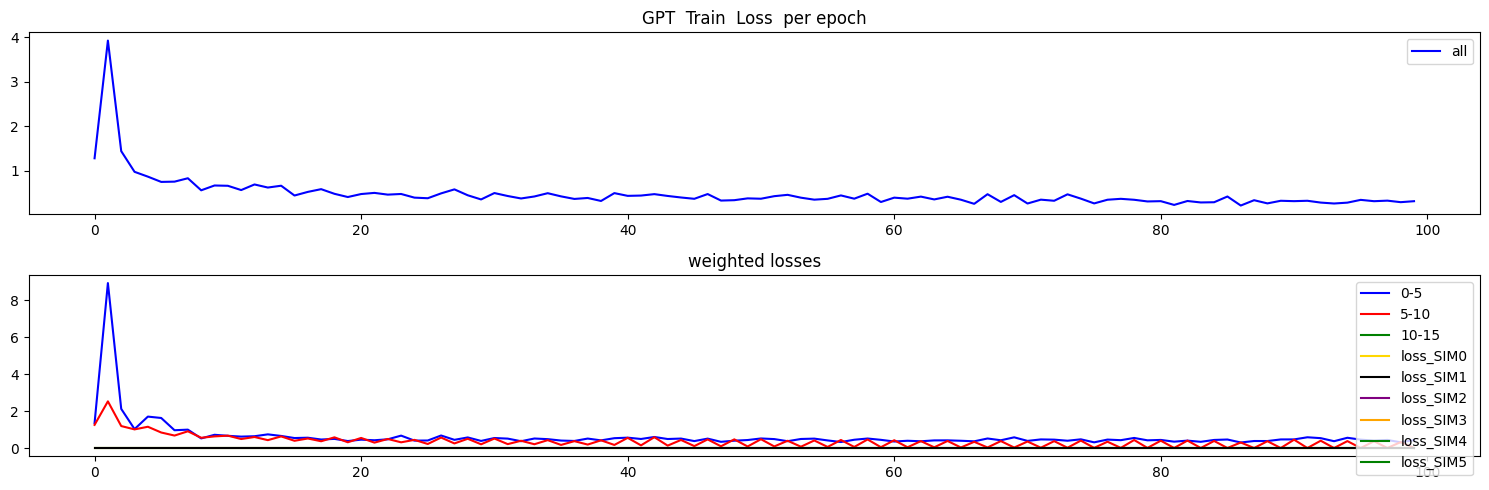

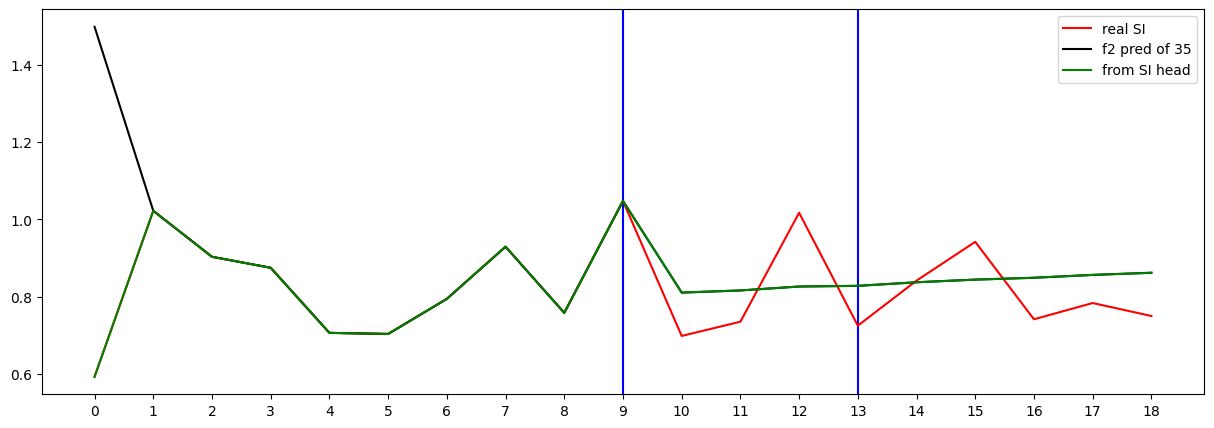

Testing R**2 - (all) - (no inputs):  0.9977530142330656
Testing R**2 - (f2) - SI full (no inputs):  -0.30315830224630425
Testing R**2 - SI head only (no inputs):  -0.30315830224630425
0 ...index R**2 (no inputs):  -0.20982305947047664
1 ...index R**2 (no inputs):  -0.06258288987112026
2 ...index R**2 (no inputs):  -0.30315830224630425
3 ...index R**2 (no inputs):  -305.6648051049153
4 ...index R**2 (no inputs):  -3.6765697037115546
5 ...index R**2 (no inputs):  -0.9390649405574358
6 ...index R**2 (no inputs):  -5.655667375555438
7 ...index R**2 (no inputs):  -4618.052386923061
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10062212419150418
10 ...index R**2 (no inputs):  -0.05771046522117795
11 ...index R**2 (no inputs):  -6.176385530004199
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1933323579256263
16 ...index R**2 (no inputs):  -0.06073894494716847
17 ...index R**2 (no 

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.058908
Loss_SI: 1.1619571447372437 Loss_all: 1.1253156661987305
===


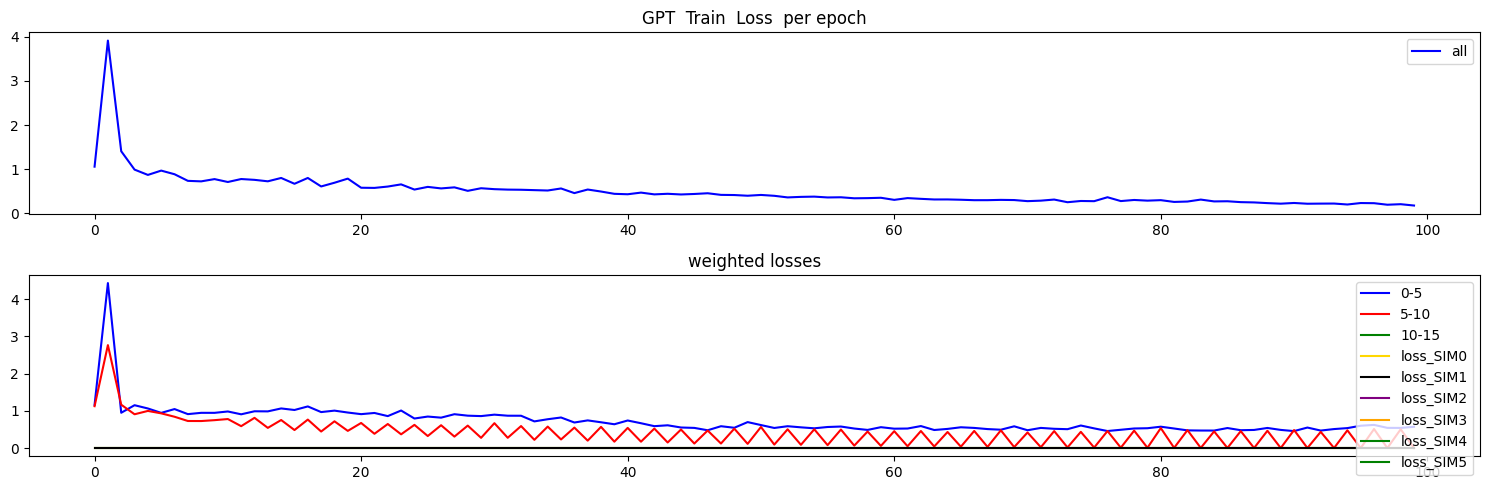

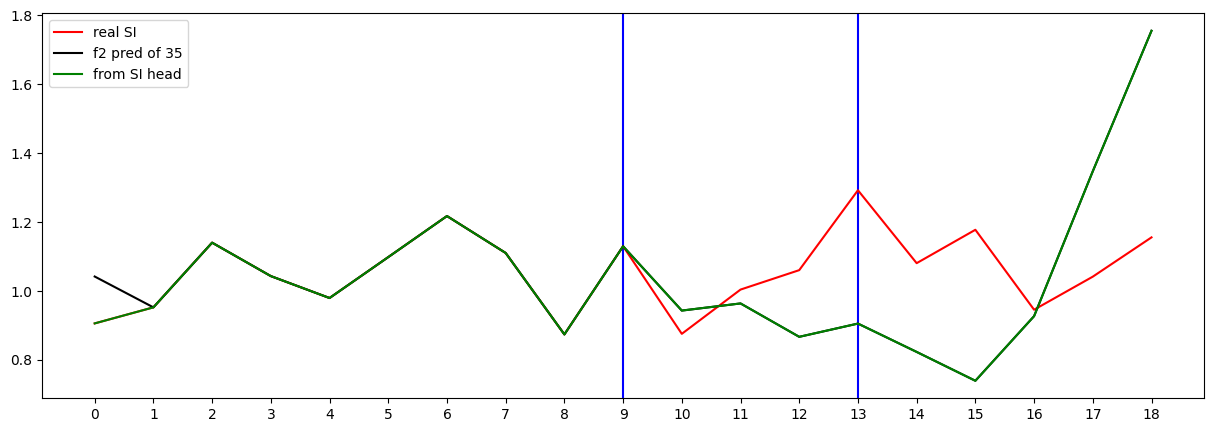

Testing R**2 - (all) - (no inputs):  0.987160216368465
Testing R**2 - (f2) - SI full (no inputs):  -9.038127200328027
Testing R**2 - SI head only (no inputs):  -9.038127200328027
0 ...index R**2 (no inputs):  -2.1121142894951537
1 ...index R**2 (no inputs):  -3.564339643677596
2 ...index R**2 (no inputs):  -9.038127200328027
3 ...index R**2 (no inputs):  -3.4234497118080656
4 ...index R**2 (no inputs):  -10.44447603632754
5 ...index R**2 (no inputs):  -2.4995472890898123
6 ...index R**2 (no inputs):  -6.859397440190194
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.480282778117455
10 ...index R**2 (no inputs):  -1.6461880921096048
11 ...index R**2 (no inputs):  -4.24994485529829
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.502609328980407
16 ...index R**2 (no inputs):  -0.9450874176075383
17 ...index R**2 (no inputs):  -6.245467651175766
18

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.233908
Loss_SI: 1.4195224046707153 Loss_all: 1.2035666704177856
===


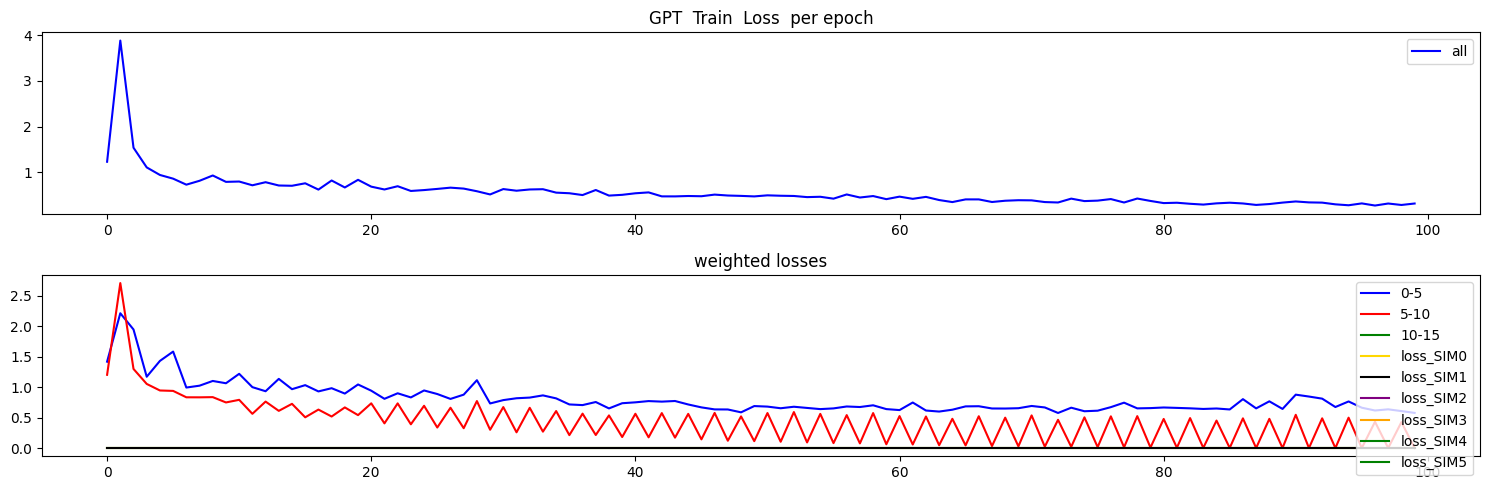

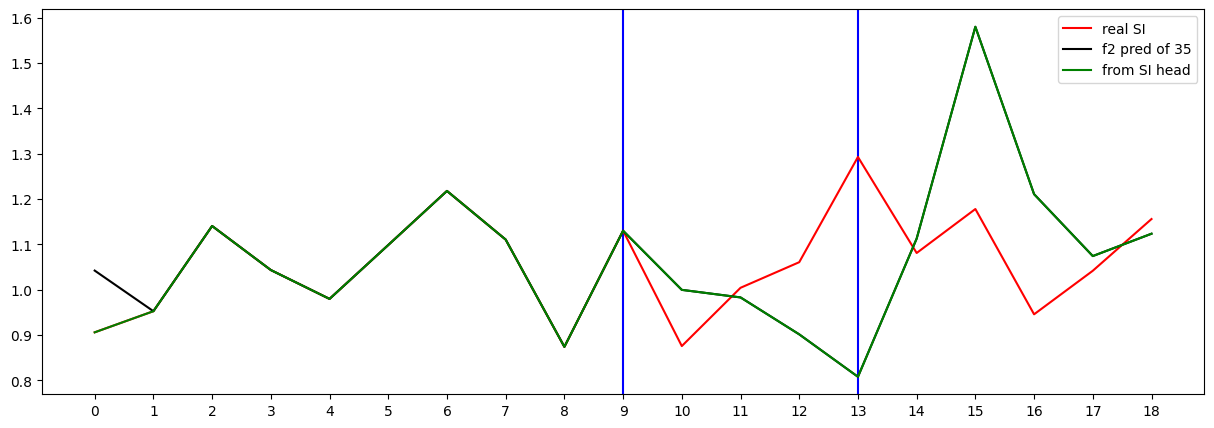

Testing R**2 - (all) - (no inputs):  0.9786775633673277
Testing R**2 - (f2) - SI full (no inputs):  -5.219944046303299
Testing R**2 - SI head only (no inputs):  -5.219944046303299
0 ...index R**2 (no inputs):  -2.9737229470760638
1 ...index R**2 (no inputs):  -3.143825969079871
2 ...index R**2 (no inputs):  -5.219944046303299
3 ...index R**2 (no inputs):  -5.020486849186971
4 ...index R**2 (no inputs):  -62.83540134207655
5 ...index R**2 (no inputs):  -4.92855240178717
6 ...index R**2 (no inputs):  -37.03932256659165
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.3310115041472774
10 ...index R**2 (no inputs):  -0.5181077147048838
11 ...index R**2 (no inputs):  -10.333320031682948
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.106639867016618
16 ...index R**2 (no inputs):  -2.1323069125400287
17 ...index R**2 (no inputs):  -15.82454987437401
1

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.147284
Loss_SI: 1.297145128250122 Loss_all: 1.1805191040039062
===


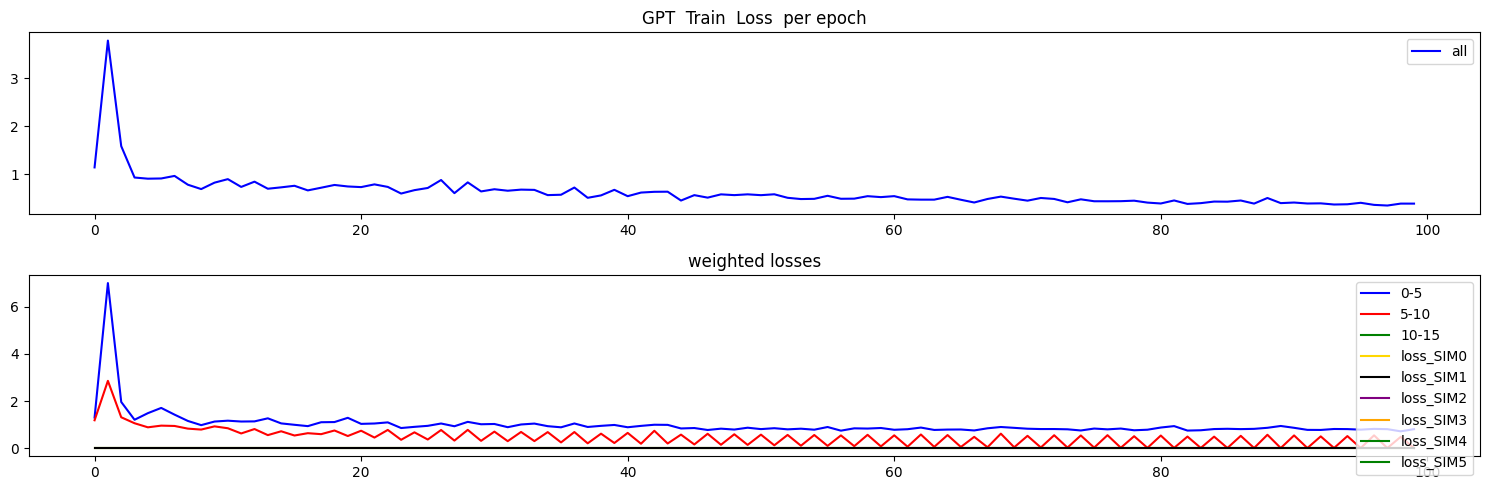

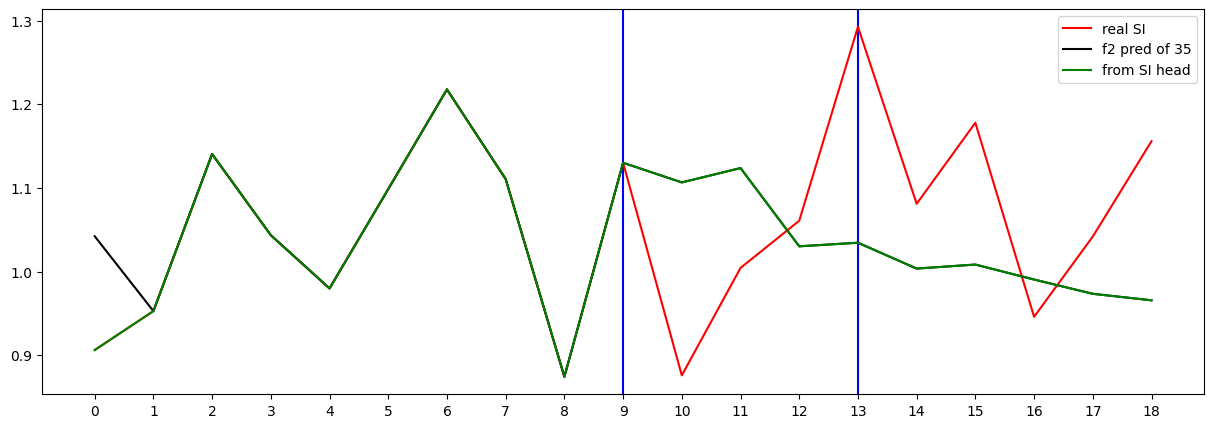

Testing R**2 - (all) - (no inputs):  0.996145255462798
Testing R**2 - (f2) - SI full (no inputs):  -0.3728316078940781
Testing R**2 - SI head only (no inputs):  -0.3728316078940781
0 ...index R**2 (no inputs):  -0.07861446149447637
1 ...index R**2 (no inputs):  -0.47979952715609686
2 ...index R**2 (no inputs):  -0.3728316078940781
3 ...index R**2 (no inputs):  -0.15311011647257722
4 ...index R**2 (no inputs):  -3.064669883611699
5 ...index R**2 (no inputs):  -0.0646793045424805
6 ...index R**2 (no inputs):  -0.7430934718139108
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8734322349406467
10 ...index R**2 (no inputs):  -0.3023913899028481
11 ...index R**2 (no inputs):  -66.01840313430306
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.835792411844652
16 ...index R**2 (no inputs):  -0.19975210547005062
17 ...index R**2 (no inputs):  -65.048363

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.448700
Loss_SI: 1.5301430225372314 Loss_all: 1.3731003999710083
===


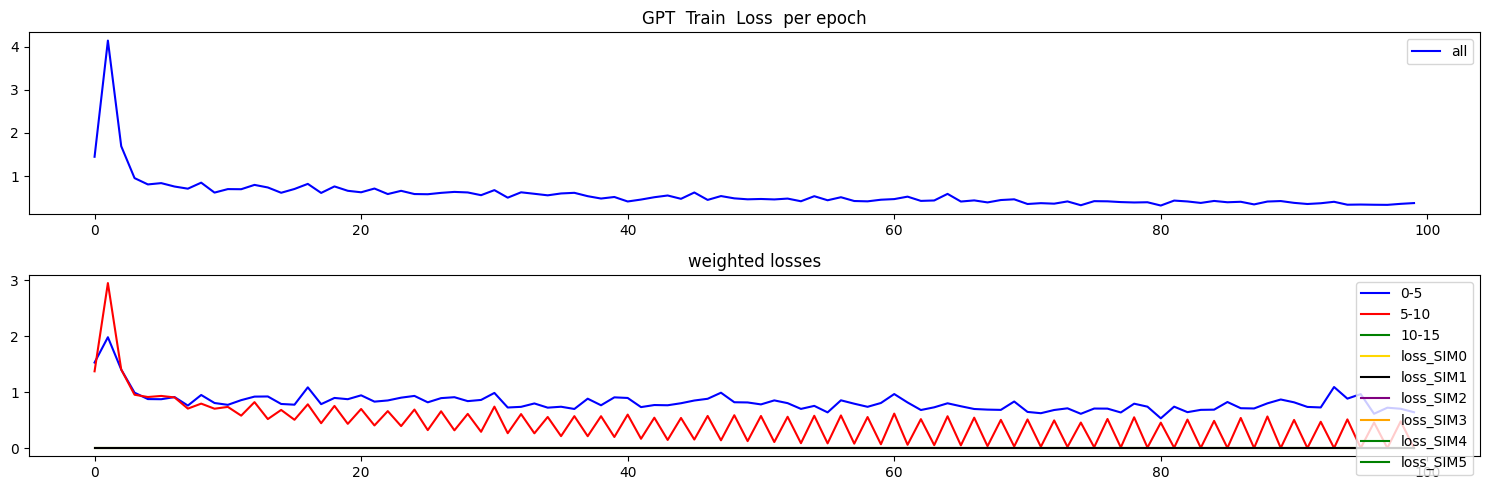

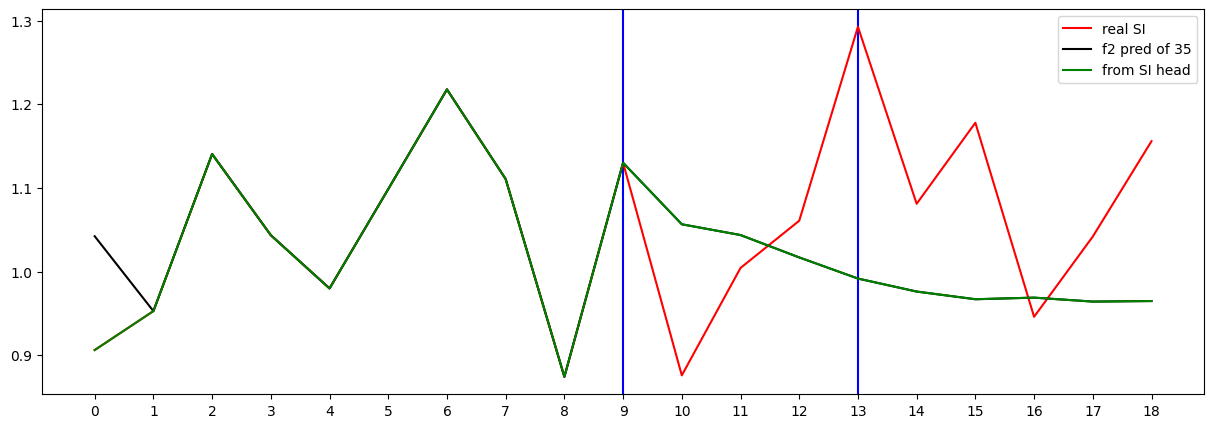

Testing R**2 - (all) - (no inputs):  0.9946547515315733
Testing R**2 - (f2) - SI full (no inputs):  -0.4979002542751467
Testing R**2 - SI head only (no inputs):  -0.4979002542751467
0 ...index R**2 (no inputs):  -0.12303978303471585
1 ...index R**2 (no inputs):  -0.20432664116872434
2 ...index R**2 (no inputs):  -0.4979002542751467
3 ...index R**2 (no inputs):  -1.1161290511592084
4 ...index R**2 (no inputs):  -0.9865186823239522
5 ...index R**2 (no inputs):  -0.47043607699331447
6 ...index R**2 (no inputs):  -0.04103915509910694
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.939387629442964
10 ...index R**2 (no inputs):  -0.5186333697014944
11 ...index R**2 (no inputs):  -14.346500751622981
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9394983077431949
16 ...index R**2 (no inputs):  -0.8576419764497163
17 ...index R**2 (no inputs):  -98.431

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.058851
Loss_SI: 1.190395712852478 Loss_all: 1.1612255573272705
===


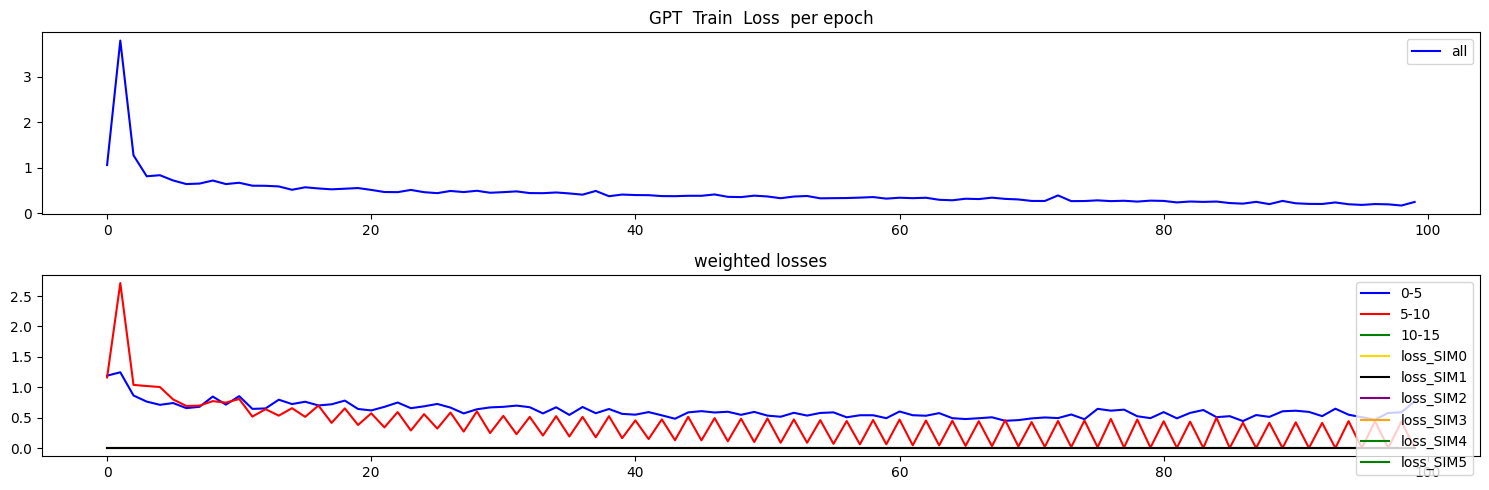

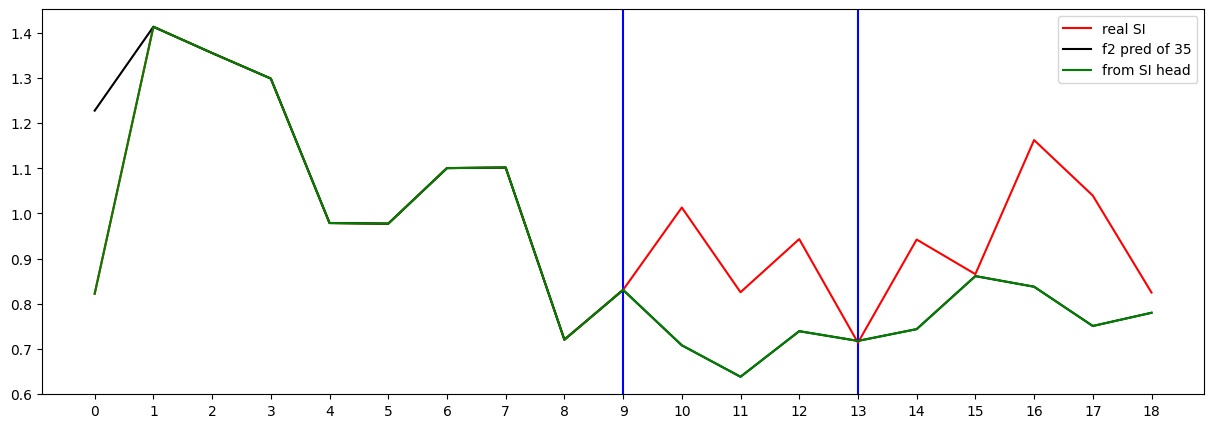

Testing R**2 - (all) - (no inputs):  0.9663116751945733
Testing R**2 - (f2) - SI full (no inputs):  -1.1485911750621285
Testing R**2 - SI head only (no inputs):  -1.1485911750621285
0 ...index R**2 (no inputs):  0.01946376082209511
1 ...index R**2 (no inputs):  -0.3763668843897483
2 ...index R**2 (no inputs):  -1.1485911750621285
3 ...index R**2 (no inputs):  0.4547261847139882
4 ...index R**2 (no inputs):  0.021373696370071915
5 ...index R**2 (no inputs):  -1.405590266248696
6 ...index R**2 (no inputs):  -73.78442970497773
7 ...index R**2 (no inputs):  -572.8085352537724
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.024637636065252266
10 ...index R**2 (no inputs):  -3.67079765261804
11 ...index R**2 (no inputs):  -38.4003469152263
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.19267263493692965
16 ...index R**2 (no inputs):  -0.35109592454029404
17 ...index R**2 (no inputs)

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.165018
Loss_SI: 0.9208902716636658 Loss_all: 1.2834136486053467
===


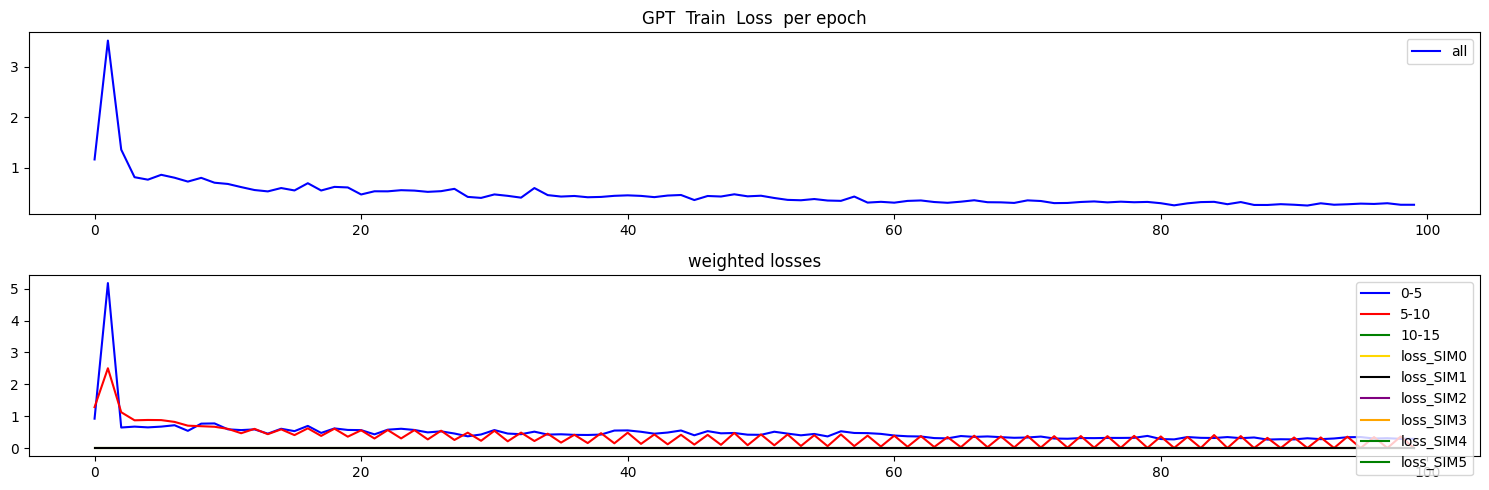

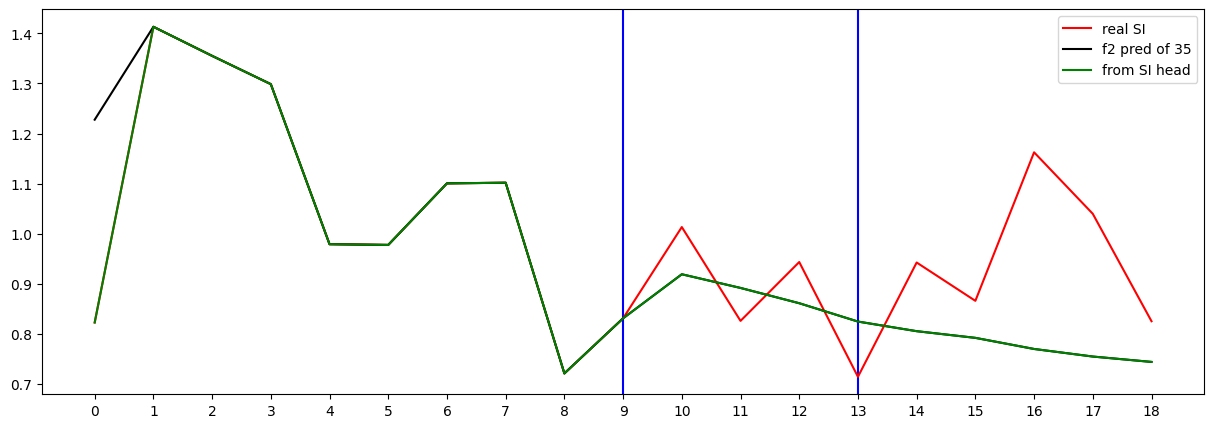

Testing R**2 - (all) - (no inputs):  0.9306483738618989
Testing R**2 - (f2) - SI full (no inputs):  -0.8790138393276736
Testing R**2 - SI head only (no inputs):  -0.8790138393276736
0 ...index R**2 (no inputs):  -0.15381599173118987
1 ...index R**2 (no inputs):  0.06905391021656837
2 ...index R**2 (no inputs):  -0.8790138393276736
3 ...index R**2 (no inputs):  -0.862682707988117
4 ...index R**2 (no inputs):  -12.081810290183522
5 ...index R**2 (no inputs):  -3.9540118638387787
6 ...index R**2 (no inputs):  -718.1717092029184
7 ...index R**2 (no inputs):  -728.198571069352
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.011985791240125554
10 ...index R**2 (no inputs):  -0.2605137485079736
11 ...index R**2 (no inputs):  -374.5371405260638
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1243065600097797
16 ...index R**2 (no inputs):  -0.19163771725192036
17 ...index R**2 (no input

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.557734
Loss_SI: 1.809549331665039 Loss_all: 1.469382643699646
===


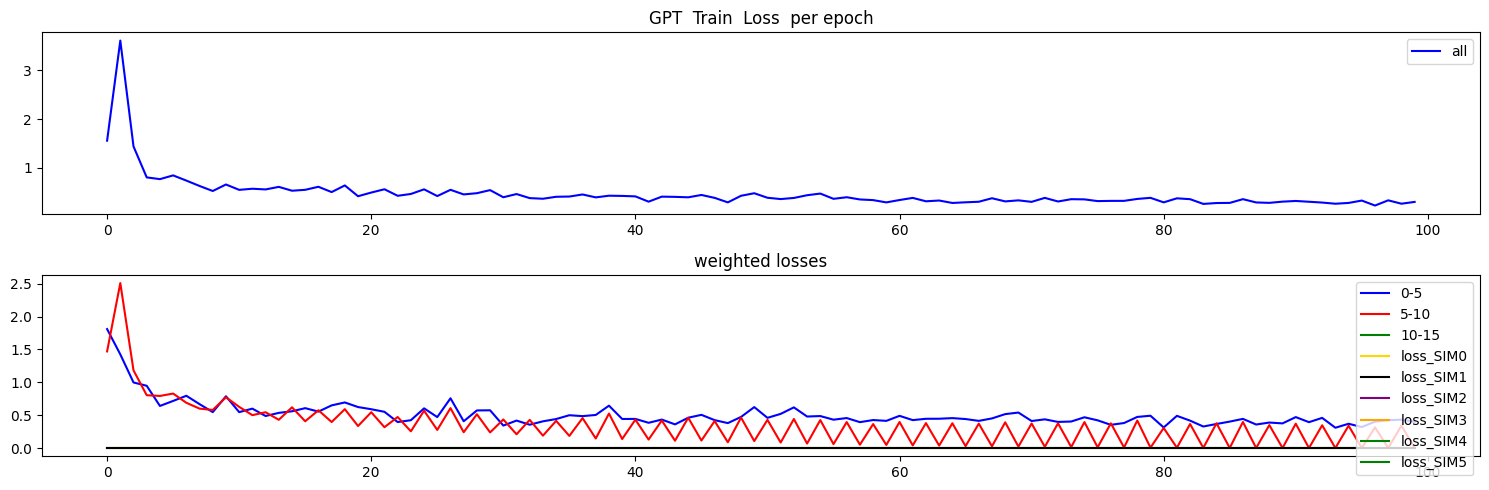

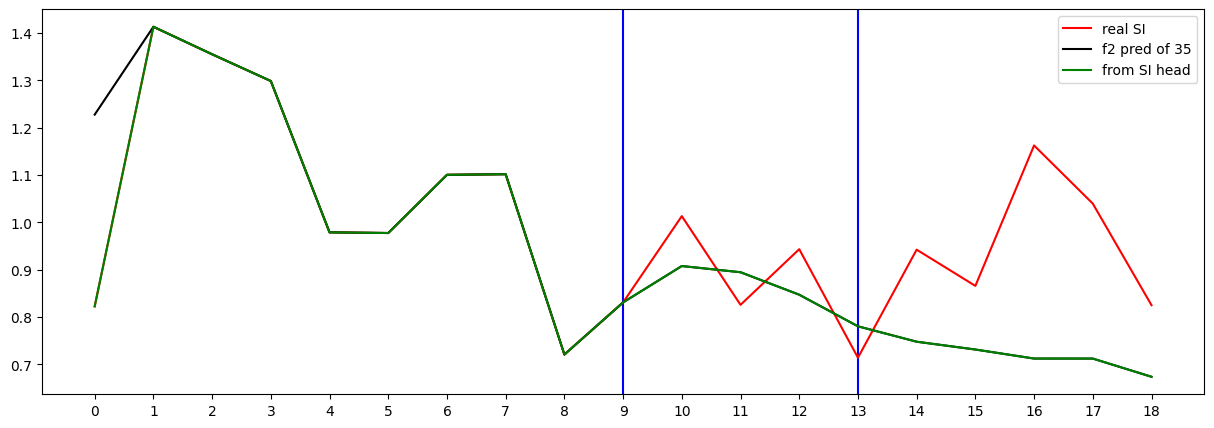

Testing R**2 - (all) - (no inputs):  0.9572463489108044
Testing R**2 - (f2) - SI full (no inputs):  -1.7276236489744239
Testing R**2 - SI head only (no inputs):  -1.7276236489744239
0 ...index R**2 (no inputs):  -0.06461811061564449
1 ...index R**2 (no inputs):  -0.1840650763039937
2 ...index R**2 (no inputs):  -1.7276236489744239
3 ...index R**2 (no inputs):  -0.5710795709930718
4 ...index R**2 (no inputs):  -3.236139124321676
5 ...index R**2 (no inputs):  -2.054990511899517
6 ...index R**2 (no inputs):  -450.8455994968169
7 ...index R**2 (no inputs):  -151.4105571773944
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05223760250701681
10 ...index R**2 (no inputs):  0.03555046074087109
11 ...index R**2 (no inputs):  -303.9266032721558
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.936476408300551
16 ...index R**2 (no inputs):  -0.16116457899627323
17 ...index R**2 (no inputs)

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.255232
Loss_SI: 1.2329398393630981 Loss_all: 1.2745929956436157
===


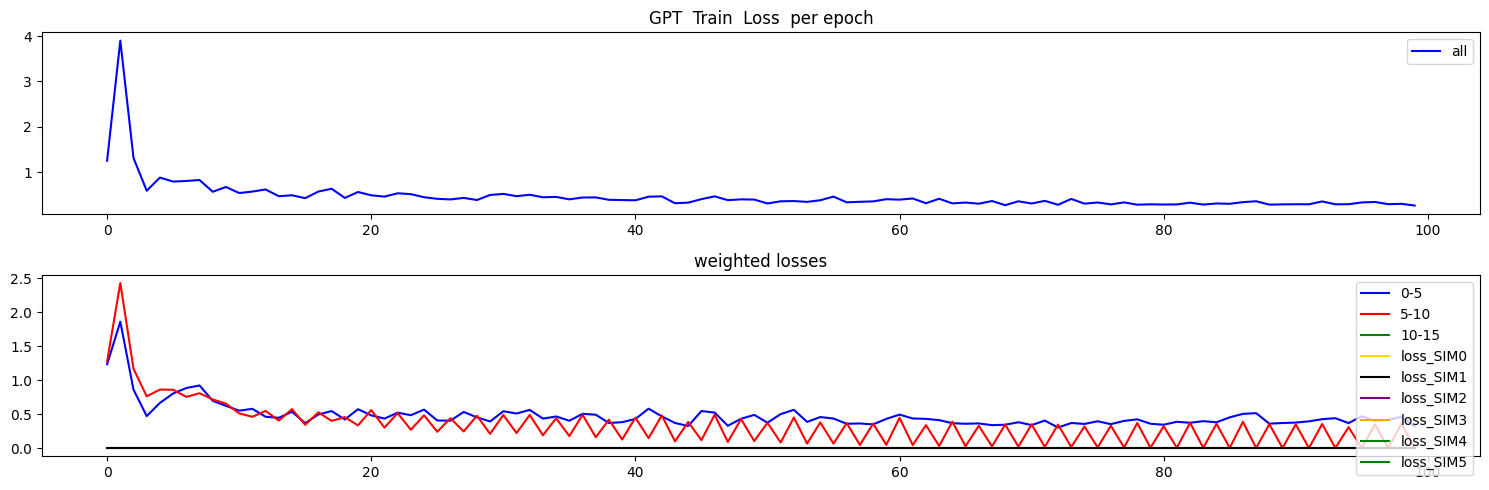

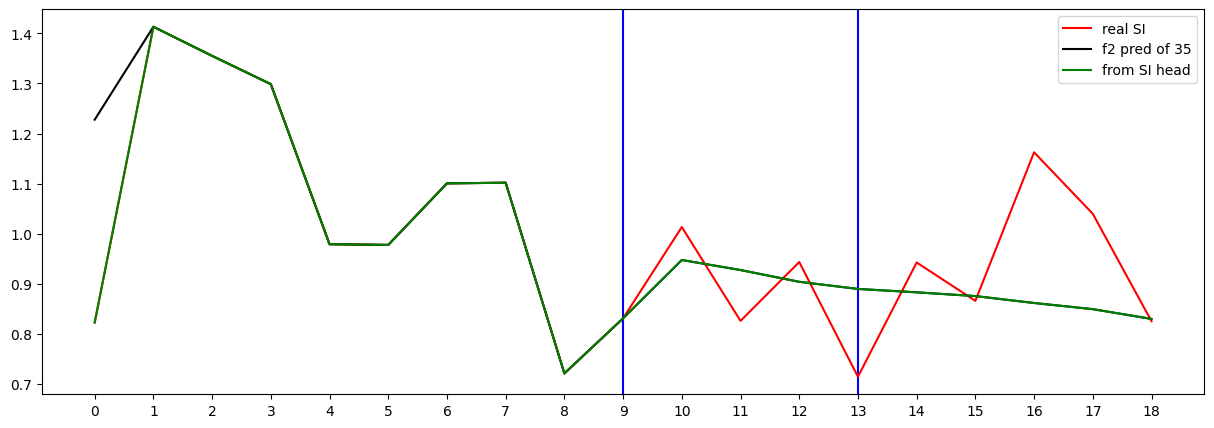

Testing R**2 - (all) - (no inputs):  0.9445278000686083
Testing R**2 - (f2) - SI full (no inputs):  -0.16738343462646466
Testing R**2 - SI head only (no inputs):  -0.16738343462646466
0 ...index R**2 (no inputs):  -0.04701624796191228
1 ...index R**2 (no inputs):  0.1170203880609153
2 ...index R**2 (no inputs):  -0.16738343462646466
3 ...index R**2 (no inputs):  -0.6891109480595099
4 ...index R**2 (no inputs):  -309.80984322416174
5 ...index R**2 (no inputs):  -2.959664141668731
6 ...index R**2 (no inputs):  -353.17499090770167
7 ...index R**2 (no inputs):  -13655.128203198577
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02101300548966134
10 ...index R**2 (no inputs):  -0.06172225608202808
11 ...index R**2 (no inputs):  -115.54702494372998
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.09251172708043498
16 ...index R**2 (no inputs):  -0.12030396021395595
17 ...index R**2 (n

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.7610857424670863


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.6613251817061736


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.24808534175092123


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.22004058845334828



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.3421245213348112
Naive_R2:....................................R²: 0.7973
RMSE:0.1641,MAE:0.1339,MASE:0.3795
1 .......................R² on just step n - R²: 0.3421245213348112
Naive_R2:....................................R²: 0.7973
RMSE:0.1641,MAE:0.1339,MASE:0.3795
2 .....................R² on first n steps - R²: -0.23642844170606514
Naive_R2:....................................R²: 0.3327
RMSE:0.1909,MAE:0.1569,MASE:0.8540
2 .......................R² on just step n - R²: -2.4412551731812004
Naive_R2:....................................R²: -0.5131
RMSE:0.2144,MAE:0.1800,MASE:1.1990
3 .....................R² on first n steps - R²: -0.18378800822941166
Naive_R2:....................................R²: 0.3755
RMSE:0.2081,MAE:0.1692,MASE:0.7185
3 .......................R² on just step n - R²: -0.15270484872684809
Naive_R2:....................................R²: 0.6037
RMSE:0.2387,MAE:0.1937,MASE:0.5141
4 .....................R² on first n s

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -0.037449234863165426
Naive_R2:....................................R²: 0.6803
RMSE:0.2061,MAE:0.1511,MASE:0.4285
1 .......................R² on just step n - R²: -0.037449234863165426
Naive_R2:....................................R²: 0.6803
RMSE:0.2061,MAE:0.1511,MASE:0.4285
2 .....................R² on first n steps - R²: -0.45489954024904944
Naive_R2:....................................R²: 0.2148
RMSE:0.2071,MAE:0.1446,MASE:0.7869
2 .......................R² on just step n - R²: -2.2417864505937852
Naive_R2:....................................R²: -0.4254
RMSE:0.2081,MAE:0.1380,MASE:0.9196
3 .....................R² on first n steps - R²: -0.2776072659238844
Naive_R2:....................................R²: 0.3260
RMSE:0.2162,MAE:0.1658,MASE:0.7043
3 .......................R² on just step n - R²: -0.10034655779702994
Naive_R2:....................................R²: 0.6217
RMSE:0.2332,MAE:0.2083,MASE:0.5528
4 .....................R² on firs

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.023067706982582425
Naive_R2:....................................R²: 0.6989
RMSE:0.2000,MAE:0.1573,MASE:0.4460
1 .......................R² on just step n - R²: 0.023067706982582425
Naive_R2:....................................R²: 0.6989
RMSE:0.2000,MAE:0.1573,MASE:0.4460
2 .....................R² on first n steps - R²: -0.36416521114810063
Naive_R2:....................................R²: 0.2637
RMSE:0.2005,MAE:0.1439,MASE:0.7834
2 .......................R² on just step n - R²: -2.026785293862252
Naive_R2:....................................R²: -0.3309
RMSE:0.2011,MAE:0.1306,MASE:0.8699
3 .....................R² on first n steps - R²: -0.021712718745078075
Naive_R2:....................................R²: 0.4610
RMSE:0.1933,MAE:0.1522,MASE:0.6462
3 .......................R² on just step n - R²: 0.3594132355613314
Naive_R2:....................................R²: 0.7798
RMSE:0.1779,MAE:0.1686,MASE:0.4475
4 .....................R² on first n

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.27534394465573375
Naive_R2:....................................R²: 0.7767
RMSE:0.1723,MAE:0.1264,MASE:0.3584
1 .......................R² on just step n - R²: 0.27534394465573375
Naive_R2:....................................R²: 0.7767
RMSE:0.1723,MAE:0.1264,MASE:0.3584
2 .....................R² on first n steps - R²: 0.03456537992304631
Naive_R2:....................................R²: 0.4789
RMSE:0.1687,MAE:0.1215,MASE:0.6613
2 .......................R² on just step n - R²: -1.0400627833072043
Naive_R2:....................................R²: 0.1030
RMSE:0.1651,MAE:0.1166,MASE:0.7768
3 .....................R² on first n steps - R²: 0.15620924410228387
Naive_R2:....................................R²: 0.5549
RMSE:0.1757,MAE:0.1360,MASE:0.5777
3 .......................R² on just step n - R²: 0.27871007531117886
Naive_R2:....................................R²: 0.7520
RMSE:0.1888,MAE:0.1650,MASE:0.4380
4 .....................R² on first n ste


## Plot


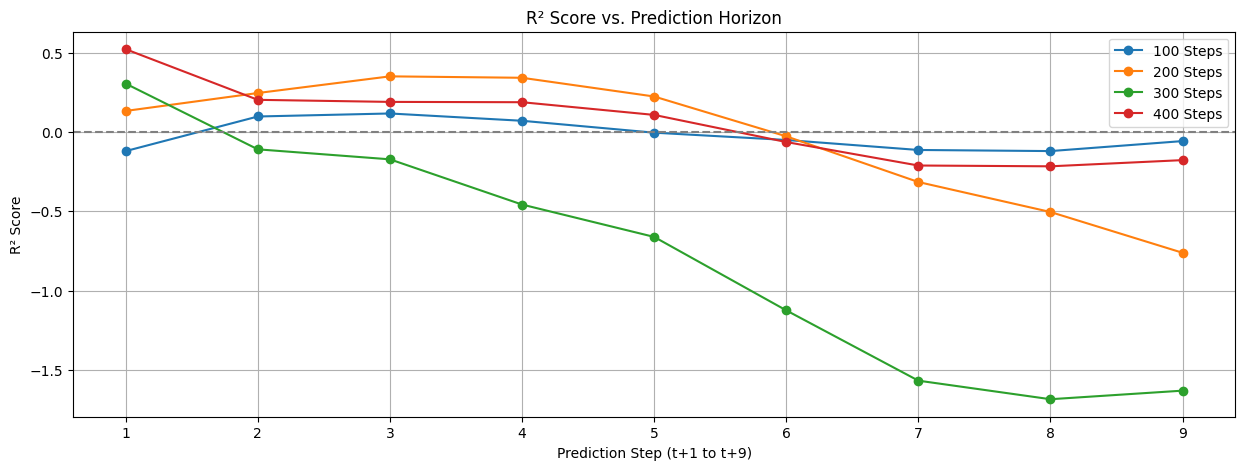

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
